### Reading and cleaning the data from the file

In [1]:
# load the required libraries

import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import time

In [2]:
#Reading the file by importing the data file
mobile_df = pd.read_csv('Mobiles.csv')
mobile_df.head(5)

,Product Name,Price,Rating,Features
0,"APPLE iPhone 14 (Blue, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
1,"APPLE iPhone 14 (Midnight, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
2,"APPLE iPhone 13 (Blue, 128 GB)","₹61,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
3,"APPLE iPhone 14 (Starlight, 128 GB)","₹67,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
4,"APPLE iPhone 11 (White, 64 GB)","₹38,999",4.6,64 GB ROM15.49 cm (6.1 inch) Liquid Retina HD ...


In [3]:
mobile_df.shape

(960, 4)

In [4]:
#checking the details
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  960 non-null    object 
 1   Price         959 non-null    object 
 2   Rating        922 non-null    float64
 3   Features      960 non-null    object 
dtypes: float64(1), object(3)
memory usage: 30.1+ KB


### Data extraction and cleaning using Regex

In [5]:
mobile_df.head(5)

,Product Name,Price,Rating,Features
0,"APPLE iPhone 14 (Blue, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
1,"APPLE iPhone 14 (Midnight, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
2,"APPLE iPhone 13 (Blue, 128 GB)","₹61,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
3,"APPLE iPhone 14 (Starlight, 128 GB)","₹67,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
4,"APPLE iPhone 11 (White, 64 GB)","₹38,999",4.6,64 GB ROM15.49 cm (6.1 inch) Liquid Retina HD ...


#### Extracting RAM, Storage, Screensize, Expandable Storage, Battery, Processor from Features column and Brand from Product Name Column

In [6]:
#Extracting RAM
re.findall('^[\w\s]+RAM', mobile_df['Features'][0])

[]

In [7]:
#Applying the regex to create a RAM column
def find_ram(x):
    match = re.findall('^[\w\s]+RAM', x)
    if match:
        return match[0]
    else:
        return np.nan

mobile_df['RAM'] = mobile_df['Features'].apply(find_ram)

In [8]:
mobile_df.head(5)

,Product Name,Price,Rating,Features,RAM
0,"APPLE iPhone 14 (Blue, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN
1,"APPLE iPhone 14 (Midnight, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN
2,"APPLE iPhone 13 (Blue, 128 GB)","₹61,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN
3,"APPLE iPhone 14 (Starlight, 128 GB)","₹67,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN
4,"APPLE iPhone 11 (White, 64 GB)","₹38,999",4.6,64 GB ROM15.49 cm (6.1 inch) Liquid Retina HD ...,NaN


In [9]:
#Extracting Storage
re.findall("\d+\s(?:GB|TB)\s*ROM", mobile_df['Features'][0])

['128 GB ROM']

In [10]:
#Applying the regex to create a Storage column
def find_rom(x):
    match = re.findall("\d+\s(?:GB|TB)\s*ROM", x)
    if match:
        return match[0]
    else:
        return np.nan

mobile_df['Storage'] = mobile_df['Features'].apply(find_rom)

In [11]:
mobile_df.head(5)

,Product Name,Price,Rating,Features,RAM,Storage
0,"APPLE iPhone 14 (Blue, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM
1,"APPLE iPhone 14 (Midnight, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM
2,"APPLE iPhone 13 (Blue, 128 GB)","₹61,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM
3,"APPLE iPhone 14 (Starlight, 128 GB)","₹67,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM
4,"APPLE iPhone 11 (White, 64 GB)","₹38,999",4.6,64 GB ROM15.49 cm (6.1 inch) Liquid Retina HD ...,NaN,64 GB ROM


In [12]:
#Extracting Expandable Memory
re.findall('Upto \d+[\s](?:GB|TB)', mobile_df['Features'][0])

[]

In [13]:
#Applying the regex to create a ExpandableMemory column
def find_expandablememory(x):
    match = re.findall('Upto \d+[\s](?:GB|TB)', x)
    if match:
        return match[0]
    else:
        return np.nan

mobile_df['ExpandableMemory'] = mobile_df['Features'].apply(find_expandablememory)

In [14]:
mobile_df.head(5)

,Product Name,Price,Rating,Features,RAM,Storage,ExpandableMemory
0,"APPLE iPhone 14 (Blue, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN
1,"APPLE iPhone 14 (Midnight, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN
2,"APPLE iPhone 13 (Blue, 128 GB)","₹61,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN
3,"APPLE iPhone 14 (Starlight, 128 GB)","₹67,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN
4,"APPLE iPhone 11 (White, 64 GB)","₹38,999",4.6,64 GB ROM15.49 cm (6.1 inch) Liquid Retina HD ...,NaN,64 GB ROM,NaN


In [15]:
#Extracting Battery
re.findall('\d+\smAh', mobile_df['Features'][0])

[]

In [16]:
#Applying the regex to create a Battery column
def find_Battery(x):
    match = re.findall('\d+\smAh', x)
    if match:
        return match[0]
    else:
        return np.nan

mobile_df['Battery'] = mobile_df['Features'].apply(find_Battery)

In [17]:
mobile_df.head(5)

,Product Name,Price,Rating,Features,RAM,Storage,ExpandableMemory,Battery
0,"APPLE iPhone 14 (Blue, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN
1,"APPLE iPhone 14 (Midnight, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN
2,"APPLE iPhone 13 (Blue, 128 GB)","₹61,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN
3,"APPLE iPhone 14 (Starlight, 128 GB)","₹67,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN
4,"APPLE iPhone 11 (White, 64 GB)","₹38,999",4.6,64 GB ROM15.49 cm (6.1 inch) Liquid Retina HD ...,NaN,64 GB ROM,NaN,NaN


In [18]:
#Extracting ScreenSize
re.findall('\d+\.\d+[\s]*(?:cm|inch)', mobile_df['Features'][0])

['15.49 cm', '6.1 inch']

In [19]:
#Applying the regex to create a ScreenSize column
mobile_df['Screen Size'] = mobile_df['Features'].apply(lambda x: re.findall('\d+\.\d+[\s]*(?:cm|inch)', x))

In [20]:
mobile_df.head(5)

,Product Name,Price,Rating,Features,RAM,Storage,ExpandableMemory,Battery,Screen Size
0,"APPLE iPhone 14 (Blue, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]"
1,"APPLE iPhone 14 (Midnight, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]"
2,"APPLE iPhone 13 (Blue, 128 GB)","₹61,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]"
3,"APPLE iPhone 14 (Starlight, 128 GB)","₹67,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]"
4,"APPLE iPhone 11 (White, 64 GB)","₹38,999",4.6,64 GB ROM15.49 cm (6.1 inch) Liquid Retina HD ...,NaN,64 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]"


In [21]:
#Splitting the screen size into cms and inches
mobile_df['ScreenSize_cm'] = mobile_df['Screen Size'].apply(lambda x: x[0] if type(x) == list and len(x) >= 1 else np.nan)
mobile_df['ScreenSize_inch'] = mobile_df['Screen Size'].apply(lambda x: x[1] if type(x) == list and len(x) >= 2 else np.nan)

In [22]:
mobile_df.head(5)

,Product Name,Price,Rating,Features,RAM,Storage,ExpandableMemory,Battery,Screen Size,ScreenSize_cm,ScreenSize_inch
0,"APPLE iPhone 14 (Blue, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch
1,"APPLE iPhone 14 (Midnight, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch
2,"APPLE iPhone 13 (Blue, 128 GB)","₹61,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch
3,"APPLE iPhone 14 (Starlight, 128 GB)","₹67,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch
4,"APPLE iPhone 11 (White, 64 GB)","₹38,999",4.6,64 GB ROM15.49 cm (6.1 inch) Liquid Retina HD ...,NaN,64 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch


In [23]:
#Extracting Processor
re.findall('(?:Battery)(.*)Processor',mobile_df['Features'][5])

[]

In [24]:
#Applying regex to create a Processor Column
mobile_df['Processor'] = mobile_df['Features'].apply(lambda x: re.findall('(?:Battery)(.*)Processor', x))
for i in range(0,len(mobile_df)):
    if mobile_df['Processor'][i]==[]:
        mobile_df['Processor'][i]=re.findall('(?:Camera|Front Camera)(.*)(?:Processor|processor)',mobile_df['Features'][i])
        
mobile_df['Processor'] = mobile_df['Processor'].fillna(np.nan)
mobile_df['Processor'] = mobile_df['Processor'].apply(lambda x: ''.join(x))
mobile_df['Processor']=mobile_df['Processor']

C:\Users\akhil\AppData\Local\Temp\ipykernel_12372\105400108.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile_df['Processor'][i]=re.findall('(?:Camera|Front Camera)(.*)(?:Processor|processor)',mobile_df['Features'][i])


In [25]:
mobile_df['Processor'] = mobile_df['Processor'].apply(lambda x: str(x).replace('5G Phone', ''))
mobile_df['Processor'] = mobile_df['Processor'].apply(lambda x: str(x).replace('@', ''))
mobile_df['Processor'] = mobile_df['Processor'].apply(lambda x: str(x).replace(' | 7MP Front Camera', ''))
mobile_df['Processor'] = mobile_df['Processor'].apply(lambda x: str(x).replace('CPU: ', ''))
mobile_df['Processor'] = mobile_df['Processor'].apply(lambda x: str(x).replace('®', ''))
mobile_df['Processor'] = mobile_df['Processor'].apply(lambda x: str(x).replace(' | 1.2MP Front Camera', ''))
mobile_df['Processor'] = mobile_df['Processor'].apply(lambda x: str(x).replace('HiSilicon ', ''))
mobile_df['Processor'] = mobile_df['Processor'].apply(lambda x: str(x).replace('Huawei ', ''))
mobile_df['Processor'] = mobile_df['Processor'].apply(lambda x: str(x).replace('HUAWEI ', ''))
mobile_df['Processor'] = mobile_df['Processor'].apply(lambda x: str(x).replace('Google ', ''))
mobile_df['Processor'] = mobile_df['Processor'].apply(lambda x: str(x).replace(' | 5MP Front Camera', ''))
mobile_df['Processor'] = mobile_df['Processor'].apply(lambda x: str(x).replace('Apple ', ''))
mobile_df['Processor'] = mobile_df['Processor'].apply(lambda x: str(x).replace(' | 5MP Front CameraApple ', ''))

In [26]:
mobile_df.head(5)

,Product Name,Price,Rating,Features,RAM,Storage,ExpandableMemory,Battery,Screen Size,ScreenSize_cm,ScreenSize_inch,Processor
0,"APPLE iPhone 14 (Blue, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor"
1,"APPLE iPhone 14 (Midnight, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor"
2,"APPLE iPhone 13 (Blue, 128 GB)","₹61,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,A15 Bionic Chip
3,"APPLE iPhone 14 (Starlight, 128 GB)","₹67,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor"
4,"APPLE iPhone 11 (White, 64 GB)","₹38,999",4.6,64 GB ROM15.49 cm (6.1 inch) Liquid Retina HD ...,NaN,64 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,A13 Bionic Chip


In [27]:
mobile_df['Processor'][0]

'A15 Bionic Chip, 6 Core Processor '

In [28]:
re.findall('^\w+',mobile_df['Processor'][0])

['A15']

In [29]:
def find_Processor(x):
    match = re.findall('^\w+',x)
    if match:
        return match[0]
    else:
        return np.nan

mobile_df['ProcessorName'] = mobile_df['Processor'].apply(find_Processor)
mobile_df['ProcessorName']=mobile_df['ProcessorName'].str.capitalize()

In [30]:
mobile_df.head(5)

,Product Name,Price,Rating,Features,RAM,Storage,ExpandableMemory,Battery,Screen Size,ScreenSize_cm,ScreenSize_inch,Processor,ProcessorName
0,"APPLE iPhone 14 (Blue, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor",A15
1,"APPLE iPhone 14 (Midnight, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor",A15
2,"APPLE iPhone 13 (Blue, 128 GB)","₹61,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,A15 Bionic Chip,A15
3,"APPLE iPhone 14 (Starlight, 128 GB)","₹67,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor",A15
4,"APPLE iPhone 11 (White, 64 GB)","₹38,999",4.6,64 GB ROM15.49 cm (6.1 inch) Liquid Retina HD ...,NaN,64 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,A13 Bionic Chip,A13


In [31]:
#Extracting Brand
re.findall('^[A-Za-z]+', mobile_df['Product Name'][0])

['APPLE']

In [32]:
def find_Brand(x):
    match = re.findall('^[A-Za-z]+', x)
    if match:
        return match[0]
    else:
        return np.nan

mobile_df['Brand'] = mobile_df['Product Name'].apply(find_Brand)

In [33]:
mobile_df['Brand'] = mobile_df['Brand'].str.capitalize()

In [34]:
mobile_df.head(5)

,Product Name,Price,Rating,Features,RAM,Storage,ExpandableMemory,Battery,Screen Size,ScreenSize_cm,ScreenSize_inch,Processor,ProcessorName,Brand
0,"APPLE iPhone 14 (Blue, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor",A15,Apple
1,"APPLE iPhone 14 (Midnight, 128 GB)","₹66,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor",A15,Apple
2,"APPLE iPhone 13 (Blue, 128 GB)","₹61,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,A15 Bionic Chip,A15,Apple
3,"APPLE iPhone 14 (Starlight, 128 GB)","₹67,999",4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor",A15,Apple
4,"APPLE iPhone 11 (White, 64 GB)","₹38,999",4.6,64 GB ROM15.49 cm (6.1 inch) Liquid Retina HD ...,NaN,64 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,A13 Bionic Chip,A13,Apple


In [35]:
mobile_df.Price

0      ₹66,999
1      ₹66,999
2      ₹61,999
3      ₹67,999
4      ₹38,999
        ...   
955    ₹54,399
956    ₹33,299
957    ₹37,999
958    ₹62,500
959    ₹57,999
Name: Price, Length: 960, dtype: object

In [36]:
x = "₹66,999"
x

'₹66,999'

In [37]:
x.replace('₹', '').replace(',', '')

'66999'

In [38]:
mobile_df['Price'] = mobile_df['Price'].apply(lambda x: str(x).replace('₹', '').replace(',', ''))
mobile_df['Price'] = pd.to_numeric(mobile_df['Price'], errors='coerce')


In [39]:
mobile_df.Price

0      66999.0
1      66999.0
2      61999.0
3      67999.0
4      38999.0
        ...   
955    54399.0
956    33299.0
957    37999.0
958    62500.0
959    57999.0
Name: Price, Length: 960, dtype: float64

In [40]:
mobile_df.head()

,Product Name,Price,Rating,Features,RAM,Storage,ExpandableMemory,Battery,Screen Size,ScreenSize_cm,ScreenSize_inch,Processor,ProcessorName,Brand
0,"APPLE iPhone 14 (Blue, 128 GB)",66999.0,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor",A15,Apple
1,"APPLE iPhone 14 (Midnight, 128 GB)",66999.0,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor",A15,Apple
2,"APPLE iPhone 13 (Blue, 128 GB)",61999.0,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,A15 Bionic Chip,A15,Apple
3,"APPLE iPhone 14 (Starlight, 128 GB)",67999.0,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor",A15,Apple
4,"APPLE iPhone 11 (White, 64 GB)",38999.0,4.6,64 GB ROM15.49 cm (6.1 inch) Liquid Retina HD ...,NaN,64 GB ROM,NaN,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,A13 Bionic Chip,A13,Apple


### EDA

#### check for missing values

In [41]:
mobile_df.isnull()

,Product Name,Price,Rating,Features,RAM,Storage,ExpandableMemory,Battery,Screen Size,ScreenSize_cm,ScreenSize_inch,Processor,ProcessorName,Brand
0,False,False,False,False,True,False,True,True,False,False,False,False,False,False
1,False,False,False,False,True,False,True,True,False,False,False,False,False,False
2,False,False,False,False,True,False,True,True,False,False,False,False,False,False
3,False,False,False,False,True,False,True,True,False,False,False,False,False,False
4,False,False,False,False,True,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,False,False,False,False,False,False,True,False,False,False,False,False,True,False
956,False,False,False,False,False,False,False,False,False,False,False,False,False,False
957,False,False,False,False,False,False,False,False,False,False,False,False,False,False
958,False,False,False,False,True,False,True,True,False,False,False,False,False,False


In [42]:
mobile_df.isnull().sum()

Product Name          0
Price                 1
Rating               38
Features              0
RAM                 400
Storage               2
ExpandableMemory    835
Battery             403
Screen Size           0
ScreenSize_cm         2
ScreenSize_inch      18
Processor             0
ProcessorName       192
Brand                 8
dtype: int64

In [43]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Name      960 non-null    object 
 1   Price             959 non-null    float64
 2   Rating            922 non-null    float64
 3   Features          960 non-null    object 
 4   RAM               560 non-null    object 
 5   Storage           958 non-null    object 
 6   ExpandableMemory  125 non-null    object 
 7   Battery           557 non-null    object 
 8   Screen Size       960 non-null    object 
 9   ScreenSize_cm     958 non-null    object 
 10  ScreenSize_inch   942 non-null    object 
 11  Processor         960 non-null    object 
 12  ProcessorName     768 non-null    object 
 13  Brand             952 non-null    object 
dtypes: float64(2), object(12)
memory usage: 105.1+ KB


In [44]:
#deleting ExpandableMemory column as it has very few values
del mobile_df["ExpandableMemory"]

In [45]:
mobile_df.head()

,Product Name,Price,Rating,Features,RAM,Storage,Battery,Screen Size,ScreenSize_cm,ScreenSize_inch,Processor,ProcessorName,Brand
0,"APPLE iPhone 14 (Blue, 128 GB)",66999.0,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor",A15,Apple
1,"APPLE iPhone 14 (Midnight, 128 GB)",66999.0,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor",A15,Apple
2,"APPLE iPhone 13 (Blue, 128 GB)",61999.0,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,A15 Bionic Chip,A15,Apple
3,"APPLE iPhone 14 (Starlight, 128 GB)",67999.0,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor",A15,Apple
4,"APPLE iPhone 11 (White, 64 GB)",38999.0,4.6,64 GB ROM15.49 cm (6.1 inch) Liquid Retina HD ...,NaN,64 GB ROM,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,A13 Bionic Chip,A13,Apple


In [46]:
mobile_df.head(50)

,Product Name,Price,Rating,Features,RAM,Storage,Battery,Screen Size,ScreenSize_cm,ScreenSize_inch,Processor,ProcessorName,Brand
0,"APPLE iPhone 14 (Blue, 128 GB)",66999.0,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor",A15,Apple
1,"APPLE iPhone 14 (Midnight, 128 GB)",66999.0,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor",A15,Apple
2,"APPLE iPhone 13 (Blue, 128 GB)",61999.0,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,A15 Bionic Chip,A15,Apple
3,"APPLE iPhone 14 (Starlight, 128 GB)",67999.0,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor",A15,Apple
4,"APPLE iPhone 11 (White, 64 GB)",38999.0,4.6,64 GB ROM15.49 cm (6.1 inch) Liquid Retina HD ...,NaN,64 GB ROM,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,A13 Bionic Chip,A13,Apple
5,"APPLE iPhone 11 (Black, 64 GB)",38999.0,4.6,64 GB ROM15.49 cm (6.1 inch) Liquid Retina HD ...,NaN,64 GB ROM,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,A13 Bionic Chip,A13,Apple
6,"APPLE iPhone 14 (Purple, 128 GB)",67999.0,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor",A15,Apple
7,"APPLE iPhone 13 (Midnight, 128 GB)",61999.0,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,A15 Bionic Chip,A15,Apple
8,"APPLE iPhone 13 (Pink, 128 GB)",61999.0,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,A15 Bionic Chip,A15,Apple
9,"APPLE iPhone 14 (Midnight, 256 GB)",76999.0,4.7,256 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,256 GB ROM,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor",A15,Apple


In [47]:
mobile_df['Features'][24]

'8 GB RAM | 128 GB ROM16.26 cm (6.4 inch) Full HD+ Display12MP + 12MP + 8MP (OIS) | 32MP Front Camera4500 mAh Lithium-ion Battery1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for In-Box Accessories'

In [48]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Name     960 non-null    object 
 1   Price            959 non-null    float64
 2   Rating           922 non-null    float64
 3   Features         960 non-null    object 
 4   RAM              560 non-null    object 
 5   Storage          958 non-null    object 
 6   Battery          557 non-null    object 
 7   Screen Size      960 non-null    object 
 8   ScreenSize_cm    958 non-null    object 
 9   ScreenSize_inch  942 non-null    object 
 10  Processor        960 non-null    object 
 11  ProcessorName    768 non-null    object 
 12  Brand            952 non-null    object 
dtypes: float64(2), object(11)
memory usage: 97.6+ KB


### Data Analysis and Visualizations
1. Which brand has most mobiles above Rs.30,000
2. Mean, median, mode of prices and ratings
3. Distribution of mobiles by Screensizes, RAM, Storage, ProcessorName, Brand
4. To find out the popular brand
5. Median rating of all the brands
6. To find any variablility in prices of mobiles

In [49]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Name     960 non-null    object 
 1   Price            959 non-null    float64
 2   Rating           922 non-null    float64
 3   Features         960 non-null    object 
 4   RAM              560 non-null    object 
 5   Storage          958 non-null    object 
 6   Battery          557 non-null    object 
 7   Screen Size      960 non-null    object 
 8   ScreenSize_cm    958 non-null    object 
 9   ScreenSize_inch  942 non-null    object 
 10  Processor        960 non-null    object 
 11  ProcessorName    768 non-null    object 
 12  Brand            952 non-null    object 
dtypes: float64(2), object(11)
memory usage: 97.6+ KB


In [50]:
mobile_df.dtypes

Product Name        object
Price              float64
Rating             float64
Features            object
RAM                 object
Storage             object
Battery             object
Screen Size         object
ScreenSize_cm       object
ScreenSize_inch     object
Processor           object
ProcessorName       object
Brand               object
dtype: object

In [51]:
mobile_df.mean()

C:\Users\akhil\AppData\Local\Temp\ipykernel_12372\2204790131.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mobile_df.mean()


Price     63724.263816
Rating        4.392408
dtype: float64

This Mobile dataset has an average rating of 4.3 and avg price of Rs.63,000

In [52]:
mobile_df.median()

C:\Users\akhil\AppData\Local\Temp\ipykernel_12372\2429525305.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mobile_df.median()


Price     48364.0
Rating        4.4
dtype: float64

This Mobiles dataset has a median rating of 4.4 and median price of Rs.48,364

In [53]:
print(mobile_df['Price'].mode())
print(mobile_df['Rating'].mode())

0    31999.0
Name: Price, dtype: float64
0    4.5
Name: Rating, dtype: float64


The most frequently appearing price in the mobile dataset is 'Rs.31,999' The most frequently appearing rating in the mobile dataset is '4.5'

In [54]:
mobile_df.describe()

,Price,Rating
count,959.000000,922.000000
mean,63724.263816,4.392408
std,38039.704799,0.255550
min,30049.000000,2.800000
25%,35647.000000,4.300000
50%,48364.000000,4.400000
75%,77000.000000,4.600000
max,182999.000000,5.000000


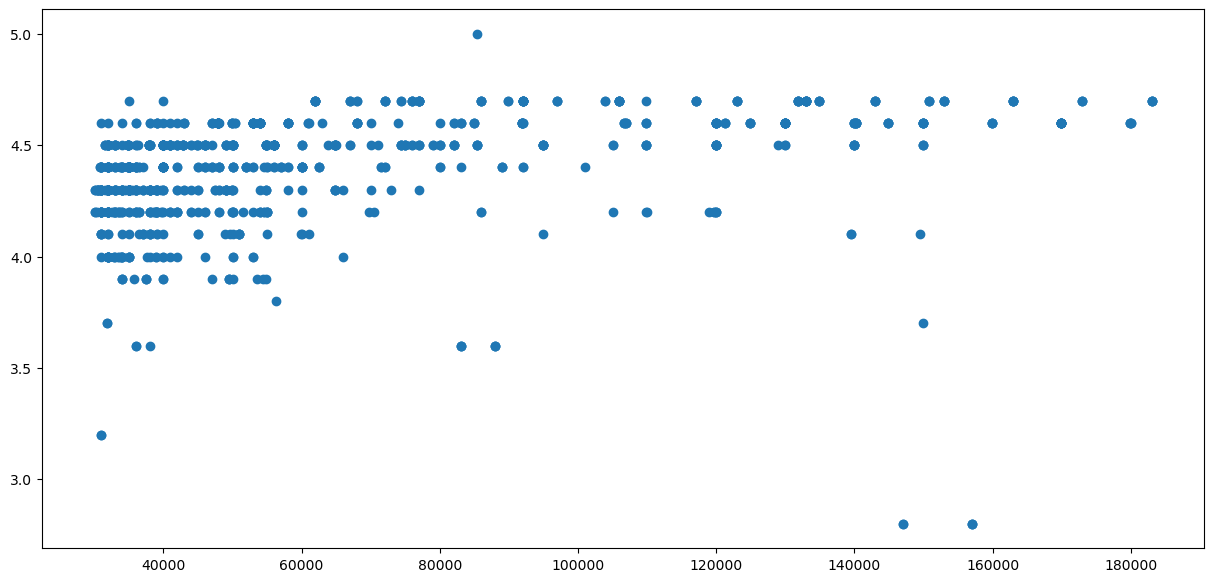

In [55]:
#Scatter plot
plt.figure(figsize = (15, 7))
plt.scatter(mobile_df['Price'], mobile_df['Rating'])
plt.show()

Inference:
 - The above graph shows that most of the mobiles listed for Rs.30000 and above has the rating of 4+

C:\Users\akhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='Rating'>

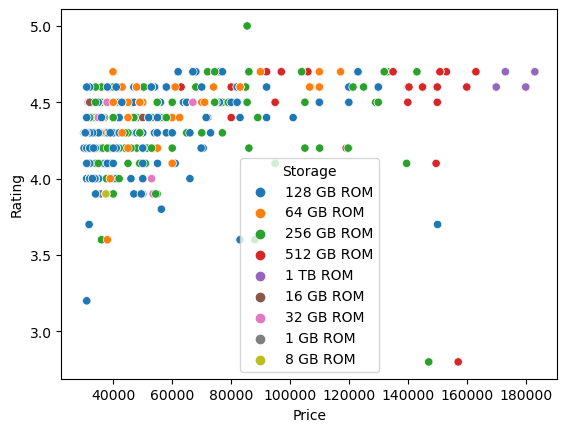

In [56]:
#Obtaining the same inference as above using seaborn scatter plot
sns.scatterplot(mobile_df['Price'], mobile_df['Rating'],hue=mobile_df['Storage'])

Inference:
 - This scatter plot was derived using seaborn and shows how mobiles are distributed based on storage within the price vs rating scatter plot.
 - All the mobiles that are rated more than '4' has a minimum of 32 GB storage that comes out of the box.

C:\Users\akhil\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\akhil\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\akhil\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\akhil\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\akhil\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.5% of the points

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'Redmi'),
  Text(2, 0, 'Samsung'),
  Text(3, 0, 'Nothing'),
  Text(4, 0, 'Motorola'),
  Text(5, 0, 'Google'),
  Text(6, 0, 'Realme'),
  Text(7, 0, 'Iqoo'),
  Text(8, 0, 'Oneplus'),
  Text(9, 0, 'Vivo'),
  Text(10, 0, 'Poco'),
  Text(11, 0, 'Mi'),
  Text(12, 0, 'Oppo'),
  Text(13, 0, 'Asus'),
  Text(14, 0, 'Xiaomi'),
  Text(15, 0, 'Lg'),
  Text(16, 0, 'Infinix'),
  Text(17, 0, 'Oukitel'),
  Text(18, 0, 'Nokia'),
  Text(19, 0, 'Htc'),
  Text(20, 0, 'Sony'),
  Text(21, 0, 'Nubia'),
  Text(22, 0, 'Honor'),
  Text(23, 0, 'Nexus'),
  Text(24, 0, 'Huawei'),
  Text(25, 0, 'Dell')])

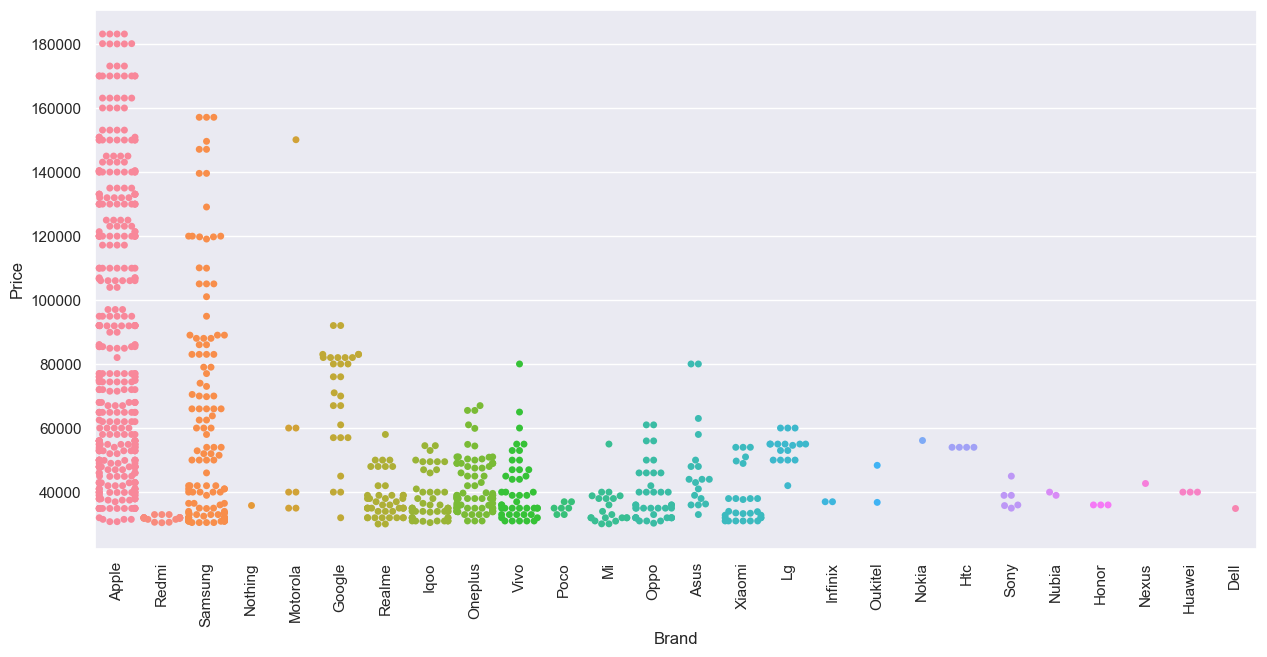

In [57]:
#Swarm plot
sns.set(rc={'figure.figsize':(15,7)})
sns.swarmplot(x='Brand',y='Price',data=mobile_df)
plt.xticks(rotation=90)

Inference:
 - The above swarm plot gives a fair understanding of how mobiles with different prices are split over based on brand.
 - Mobiles which are priced above Rs.1,00,000 belongs to Apple, Samsung and Motorola.

C:\Users\akhil\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\akhil\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\akhil\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\akhil\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\akhil\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.3% of the points

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'Redmi'),
  Text(2, 0, 'Samsung'),
  Text(3, 0, 'Nothing'),
  Text(4, 0, 'Motorola'),
  Text(5, 0, 'Google'),
  Text(6, 0, 'Realme'),
  Text(7, 0, 'Iqoo'),
  Text(8, 0, 'Oneplus'),
  Text(9, 0, 'Vivo'),
  Text(10, 0, 'Poco'),
  Text(11, 0, 'Mi'),
  Text(12, 0, 'Oppo'),
  Text(13, 0, 'Asus'),
  Text(14, 0, 'Xiaomi'),
  Text(15, 0, 'Lg'),
  Text(16, 0, 'Infinix'),
  Text(17, 0, 'Oukitel'),
  Text(18, 0, 'Nokia'),
  Text(19, 0, 'Htc'),
  Text(20, 0, 'Sony'),
  Text(21, 0, 'Nubia'),
  Text(22, 0, 'Honor'),
  Text(23, 0, 'Nexus'),
  Text(24, 0, 'Huawei'),
  Text(25, 0, 'Dell')])

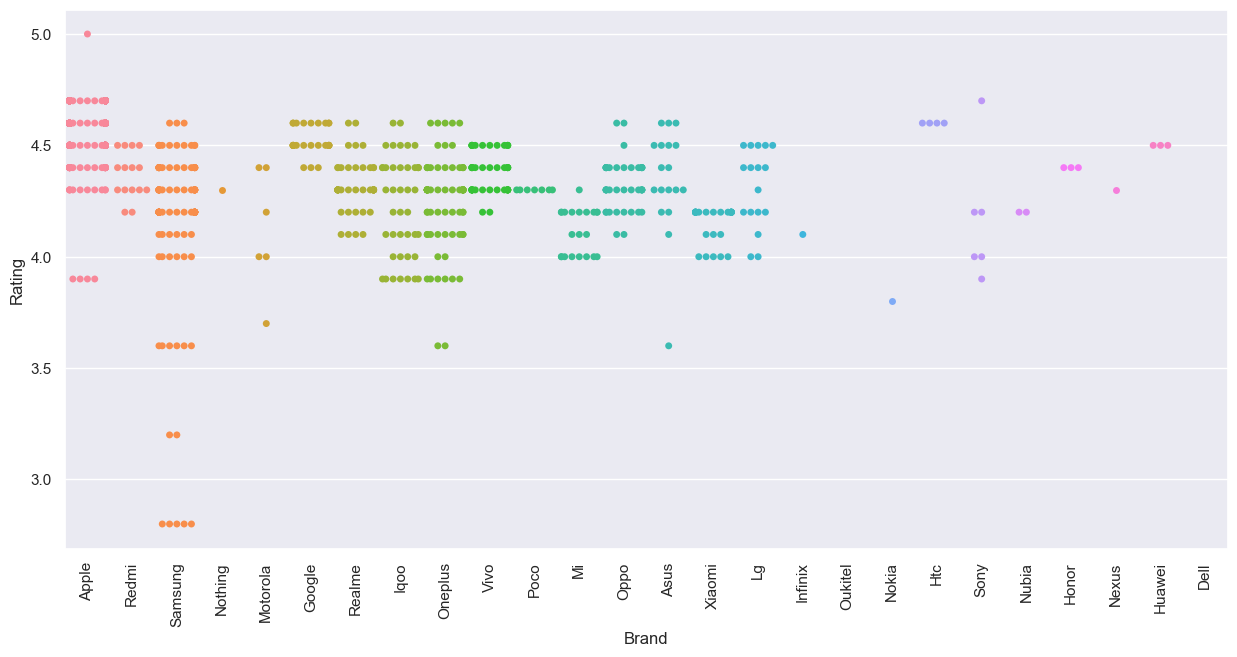

In [58]:
#Swarm Plot
sns.set(rc={'figure.figsize':(15,7)})
sns.swarmplot(x='Brand',y='Rating',data=mobile_df)
plt.xticks(rotation=90)

Inference:

 - The above swarm plot gives a fair understanding of how mobiles with different ratings are split over based on brand.
 - Most popular brands like Apple, Samsung, Motorola, Oneplus, Iqoo has mobiles rated under 4.0 while Samsung being rated even less than 3.0 for few of the mobiles.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'Redmi'),
  Text(2, 0, 'Samsung'),
  Text(3, 0, 'Nothing'),
  Text(4, 0, 'Motorola'),
  Text(5, 0, 'Google'),
  Text(6, 0, 'Realme'),
  Text(7, 0, 'Iqoo'),
  Text(8, 0, 'Oneplus'),
  Text(9, 0, 'Vivo'),
  Text(10, 0, 'Poco'),
  Text(11, 0, 'Mi'),
  Text(12, 0, 'Oppo'),
  Text(13, 0, 'Asus'),
  Text(14, 0, 'Xiaomi'),
  Text(15, 0, 'Lg'),
  Text(16, 0, 'Infinix'),
  Text(17, 0, 'Oukitel'),
  Text(18, 0, 'Nokia'),
  Text(19, 0, 'Htc'),
  Text(20, 0, 'Sony'),
  Text(21, 0, 'Nubia'),
  Text(22, 0, 'Honor'),
  Text(23, 0, 'Nexus'),
  Text(24, 0, 'Huawei'),
  Text(25, 0, 'Dell')])

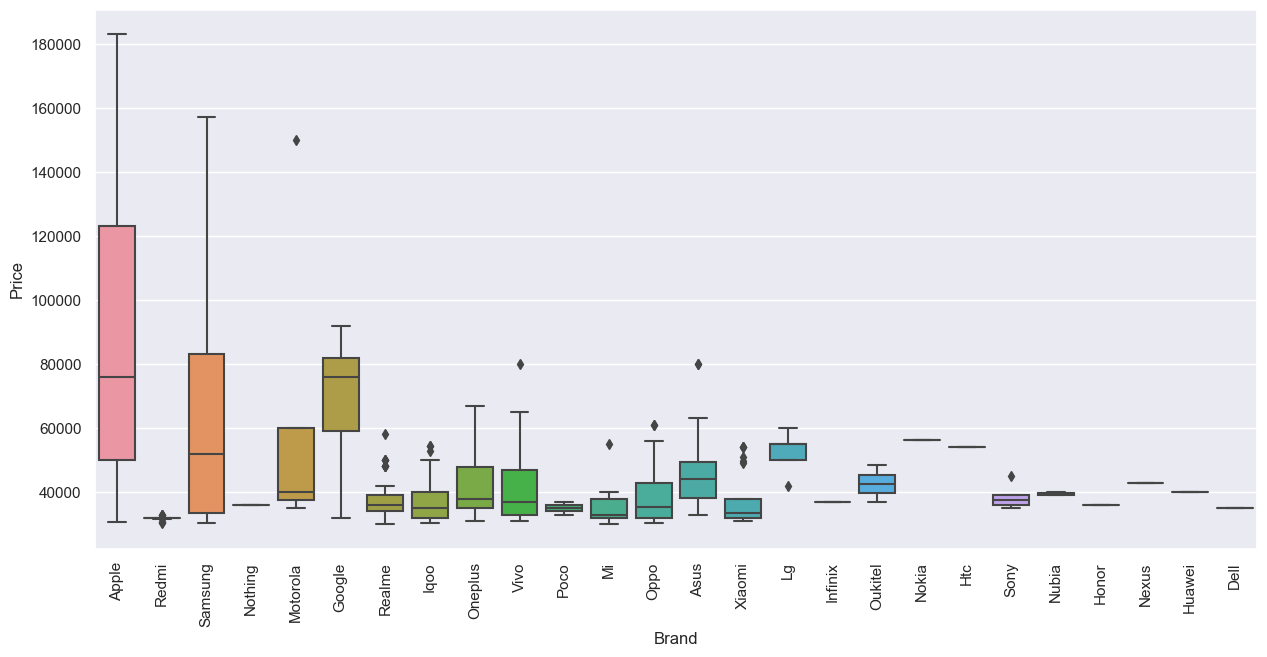

In [59]:
#Boxplot
plt.figure(figsize = (15, 7))
sns.boxplot(x= mobile_df.Brand, y= mobile_df.Price)
plt.xticks(rotation=90)

From the above boxplot these are the following inferences that can be drawn:
 - There is a greater variability of Price for Apple and Google brands with no outliers at all.
 - Brands like Redmi, Realme, Iqoo, Xiaomi have so many outliers due to large difference in average prices of their mobiles
 - Few brands yield only partial or no boxes (both whiskers overlapping) as these brands might have just one mobile or listed in the dataset or only have mobiles that fall under similar price tag.


(array([436., 196.,  72.,  59.,  40.,  43.,  36.,  40.,  16.,  21.]),
 array([ 30049.,  45344.,  60639.,  75934.,  91229., 106524., 121819.,
        137114., 152409., 167704., 182999.]),
 <BarContainer object of 10 artists>)

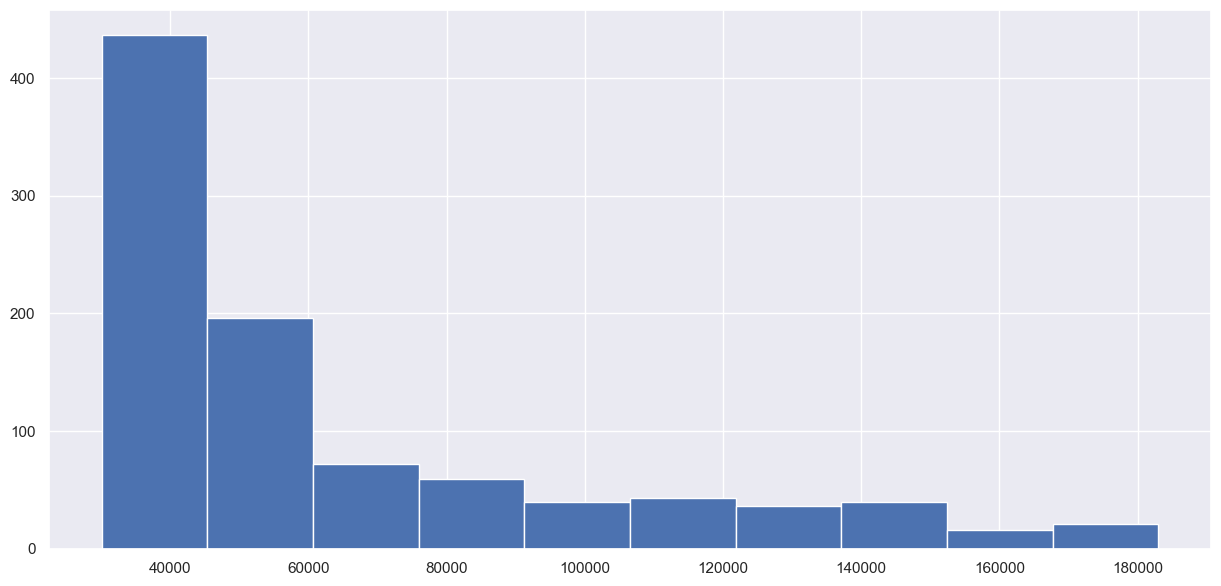

In [60]:
#Histograms
plt.hist(mobile_df['Price'])

Inference:
 - The above histogram is right-skewed which indicates that average price of mobile is greater than the median price of a mobile.
 - Most mobiles listed fall under the price between Rs.30,000 and Rs.50,000

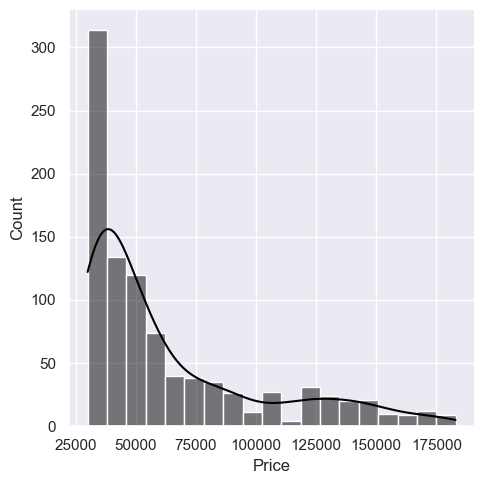

In [61]:
#displot
sns.set(rc={'figure.figsize':(15,7)})
sns.displot(mobile_df['Price'], color='black', kde=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'Redmi'),
  Text(2, 0, 'Samsung'),
  Text(3, 0, 'Nothing'),
  Text(4, 0, 'Motorola'),
  Text(5, 0, 'Google'),
  Text(6, 0, 'Realme'),
  Text(7, 0, 'Iqoo'),
  Text(8, 0, 'Oneplus'),
  Text(9, 0, 'Vivo'),
  Text(10, 0, 'Poco'),
  Text(11, 0, 'Mi'),
  Text(12, 0, 'Oppo'),
  Text(13, 0, 'Asus'),
  Text(14, 0, 'Xiaomi'),
  Text(15, 0, 'Lg'),
  Text(16, 0, 'Infinix'),
  Text(17, 0, 'Oukitel'),
  Text(18, 0, 'Nokia'),
  Text(19, 0, 'Htc'),
  Text(20, 0, 'Sony'),
  Text(21, 0, 'Nubia'),
  Text(22, 0, 'Honor'),
  Text(23, 0, 'Nexus'),
  Text(24, 0, 'Huawei'),
  Text(25, 0, 'Dell')])

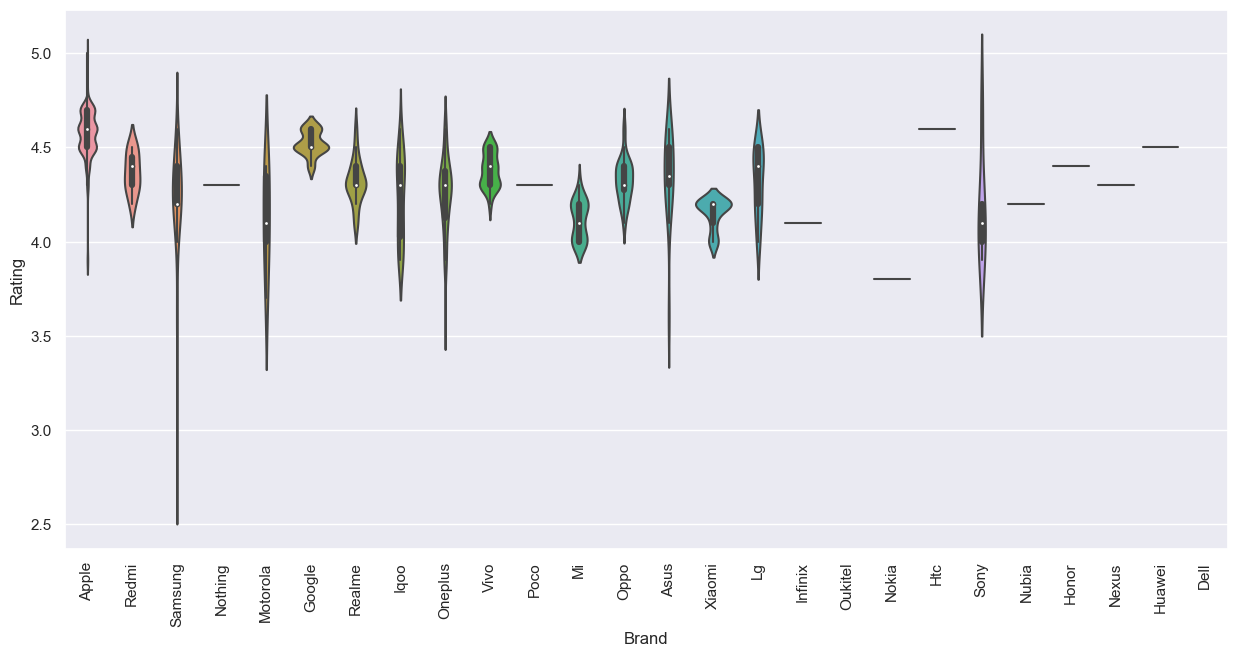

In [62]:
#Violin plot
sns.set(rc={'figure.figsize': (15,7)})
sns.violinplot(x='Brand', y='Rating',data=mobile_df)
plt.xticks(rotation=90)

Inference:
 - The above plot shows the relationship between Brand and its Rating
 - The Median rating of Apple is greater than all the other brands followed by Google, Redmi, Vivo, etc.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'Redmi'),
  Text(2, 0, 'Samsung'),
  Text(3, 0, 'Nothing'),
  Text(4, 0, 'Motorola'),
  Text(5, 0, 'Google'),
  Text(6, 0, 'Realme'),
  Text(7, 0, 'Iqoo'),
  Text(8, 0, 'Oneplus'),
  Text(9, 0, 'Vivo'),
  Text(10, 0, 'Poco'),
  Text(11, 0, 'Mi'),
  Text(12, 0, 'Oppo'),
  Text(13, 0, 'Asus'),
  Text(14, 0, 'Xiaomi'),
  Text(15, 0, 'Lg'),
  Text(16, 0, 'Infinix'),
  Text(17, 0, 'Oukitel'),
  Text(18, 0, 'Nokia'),
  Text(19, 0, 'Htc'),
  Text(20, 0, 'Sony'),
  Text(21, 0, 'Nubia'),
  Text(22, 0, 'Honor'),
  Text(23, 0, 'Nexus'),
  Text(24, 0, 'Huawei'),
  Text(25, 0, 'Dell')])

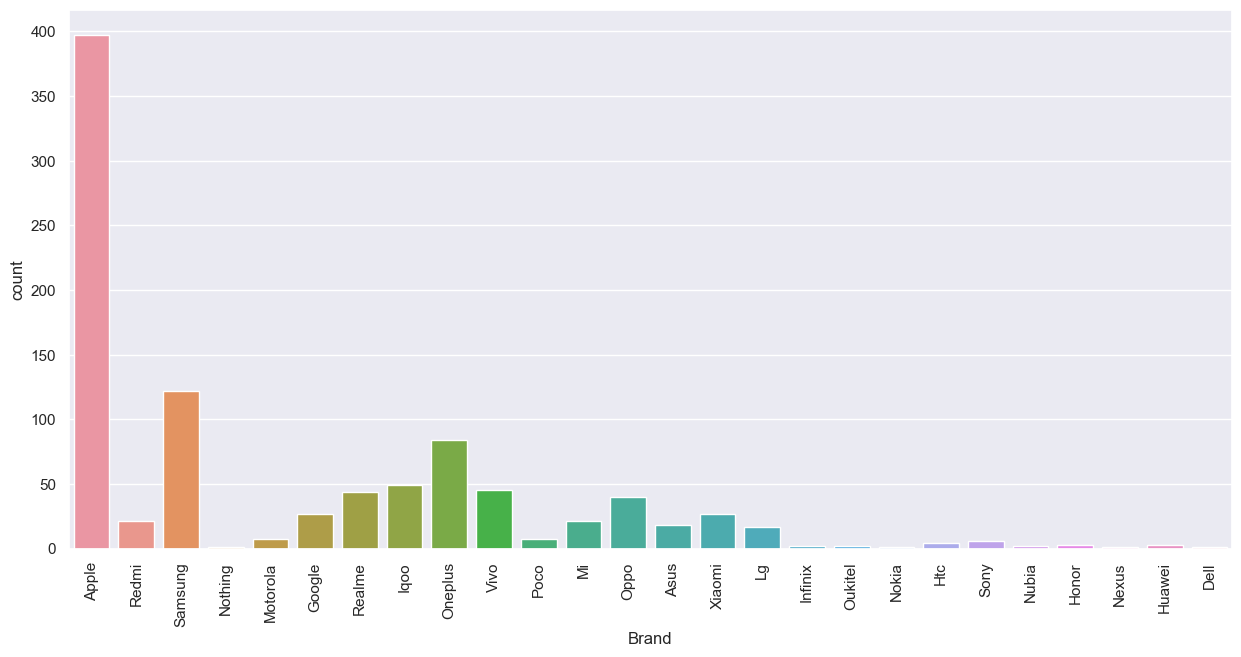

In [63]:
plt.figure(figsize = (15, 7))
sns.countplot(x= mobile_df.Brand)
plt.xticks(rotation=90)

In [64]:
mobile_df.Brand.value_counts()

Apple       397
Samsung     122
Oneplus      84
Iqoo         49
Vivo         45
Realme       44
Oppo         40
Xiaomi       27
Google       27
Mi           21
Redmi        21
Asus         18
Lg           17
Poco          7
Motorola      7
Sony          6
Htc           4
Honor         3
Huawei        3
Infinix       2
Oukitel       2
Nubia         2
Nothing       1
Nokia         1
Nexus         1
Dell          1
Name: Brand, dtype: int64

#### Inference:
 - Apple has more mobiles listed followed by Samsung, Oneplus, etc.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '128 GB ROM'),
  Text(1, 0, '64 GB ROM'),
  Text(2, 0, '256 GB ROM'),
  Text(3, 0, '512 GB ROM'),
  Text(4, 0, '1 TB ROM'),
  Text(5, 0, '16 GB ROM'),
  Text(6, 0, '32 GB ROM'),
  Text(7, 0, '1 GB ROM'),
  Text(8, 0, '8 GB ROM')])

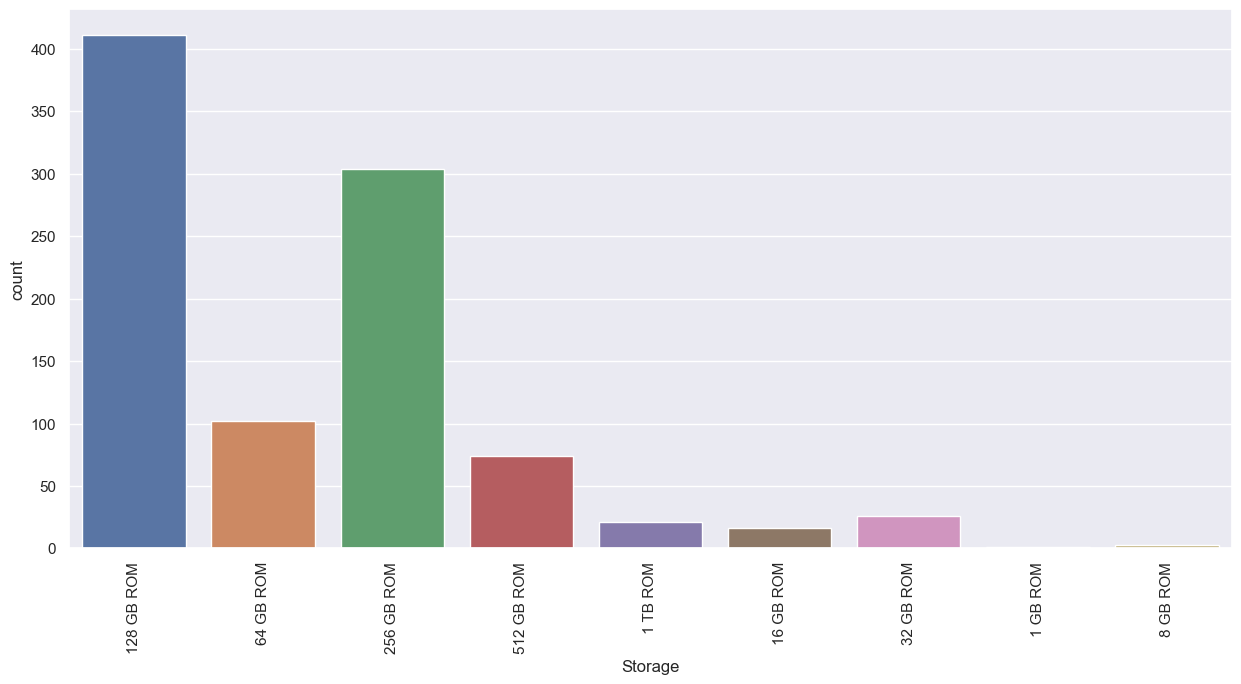

In [65]:
plt.figure(figsize = (15, 7))
sns.countplot(x= mobile_df.Storage)
plt.xticks(rotation=90)

Inference:
 - Most of the mobiles has the storage of 128GB followed by 512GB being the second most popular storage options listed above Rs.30,000

In [66]:
mobile_df.Storage.value_counts()

128 GB ROM    411
256 GB ROM    304
64 GB ROM     102
512 GB ROM     74
32 GB ROM      26
1 TB ROM       21
16 GB ROM      16
8 GB ROM        3
1 GB ROM        1
Name: Storage, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, '15.49 cm'),
  Text(1, 0, '17.02 cm'),
  Text(2, 0, '16.94 cm'),
  Text(3, 0, '16.26 cm'),
  Text(4, 0, '16.64 cm'),
  Text(5, 0, '16.51 cm'),
  Text(6, 0, '16.0 cm'),
  Text(7, 0, '13.72 cm'),
  Text(8, 0, '16.81 cm'),
  Text(9, 0, '16.76 cm'),
  Text(10, 0, '16.66 cm'),
  Text(11, 0, '16.36 cm'),
  Text(12, 0, '17.22 cm'),
  Text(13, 0, '16.33 cm'),
  Text(14, 0, '15.75 cm'),
  Text(15, 0, '16.69 cm'),
  Text(16, 0, '14.73 cm'),
  Text(17, 0, '16.23 cm'),
  Text(18, 0, '17.09 cm'),
  Text(19, 0, '14.76 cm'),
  Text(20, 0, '17.27 cm'),
  Text(21, 0, '14.99 cm'),
  Text(22, 0, '11.94 cm'),
  Text(23, 0, '15.24 cm'),
  Text(24, 0, '13.97 cm'),
  Text(25, 0, '15.95 cm'),
  Text(26, 0, '15.21 cm'),
  Text(27, 0, '16.74 cm'),
  Text(28, 0, '19.3 cm'),
  Text(29, 0, '15.5 cm'),
  Tex

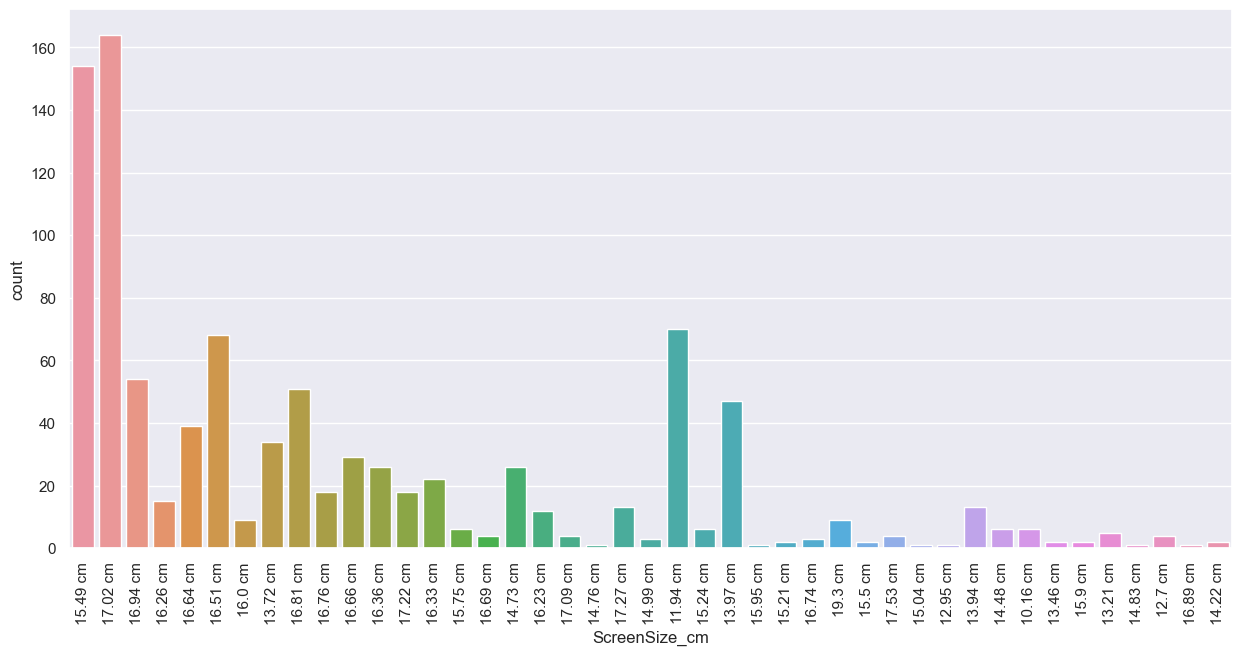

In [67]:
plt.figure(figsize = (15, 7))
sns.countplot(x= mobile_df.ScreenSize_cm)
plt.xticks(rotation=90)

Inference:
 - Most of the mobiles has the screensize of 17.02 cms followed by 15.49 cms being the second most popular screensize options listed above Rs.30,000

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, '6.1 inch'),
  Text(1, 0, '6.7 inch'),
  Text(2, 0, '6.67 inch'),
  Text(3, 0, '6.4 inch'),
  Text(4, 0, '6.55 inch'),
  Text(5, 0, '6.5 inch'),
  Text(6, 0, '6.3 inch'),
  Text(7, 0, '5.4 inch'),
  Text(8, 0, '6.62 inch'),
  Text(9, 0, '6.6 inch'),
  Text(10, 0, '6.56 inch'),
  Text(11, 0, '6.44 inch'),
  Text(12, 0, '6.78 inch'),
  Text(13, 0, '6.43 inch'),
  Text(14, 0, '6.2 inch'),
  Text(15, 0, '6.57 inch'),
  Text(16, 0, '5.8 inch'),
  Text(17, 0, '6.39 inch'),
  Text(18, 0, '6.73 inch'),
  Text(19, 0, '5.81 inch'),
  Text(20, 0, '6.8 inch'),
  Text(21, 0, '5.9 inch'),
  Text(22, 0, '4.7 inch'),
  Text(23, 0, '5.5 inch'),
  Text(24, 0, '6.28 inch'),
  Text(25, 0, '5.99 inch'),
  Text(26, 0, '6.59 inch'),
  Text(27, 0, '7.6 inch'),
  Text(28, 0, '6.102 inch'),
  Text(29, 0, '6.9 inch')

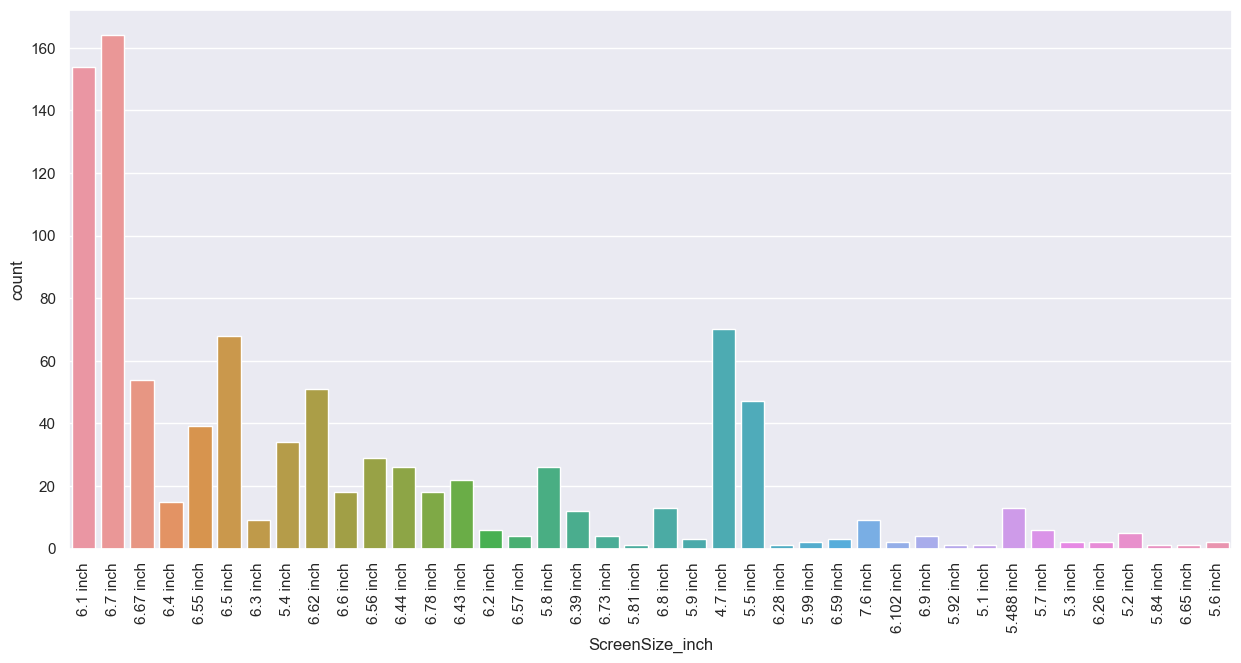

In [68]:
plt.figure(figsize = (15, 7))
sns.countplot(x= mobile_df.ScreenSize_inch)
plt.xticks(rotation=90)

Inference:
 - Most of the mobiles has the screensize of 6.7 inches followed by 6.1 inches being the second most popular screensize options listed above Rs.30,000

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '12 GB RAM'),
  Text(1, 0, '8 GB RAM'),
  Text(2, 0, '6 GB RAM'),
  Text(3, 0, '16 GB RAM'),
  Text(4, 0, '4 GB RAM'),
  Text(5, 0, '3 GB RAM'),
  Text(6, 0, '18 GB RAM')])

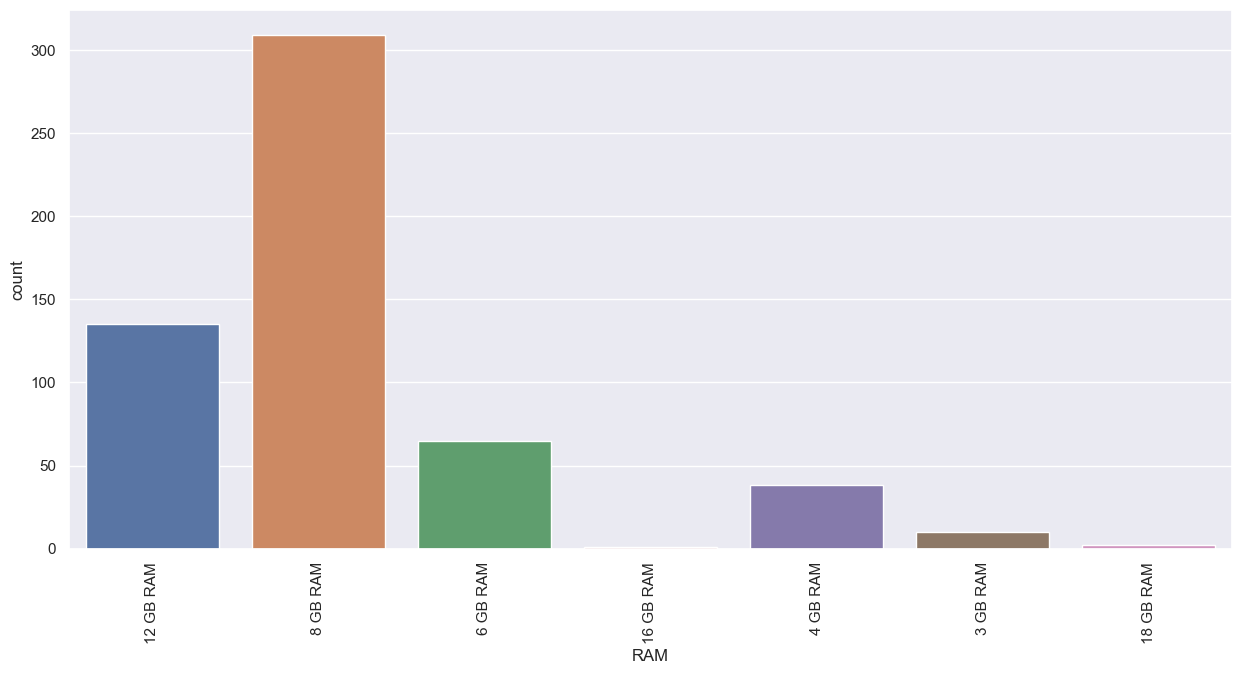

In [69]:
plt.figure(figsize = (15, 7))
sns.countplot(x= mobile_df.RAM)
plt.xticks(rotation=90)

Inference:
 - Majority mobiles hold 8GB RAM followed by 12GB.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 [Text(0, 0, '4980 mAh'),
  Text(1, 0, '4500 mAh'),
  Text(2, 0, '4400 mAh'),
  Text(3, 0, '4270 mAh'),
  Text(4, 0, '4926 mAh'),
  Text(5, 0, '5000 mAh'),
  Text(6, 0, '3300 mAh'),
  Text(7, 0, '4800 mAh'),
  Text(8, 0, '4610 mAh'),
  Text(9, 0, '4830 mAh'),
  Text(10, 0, '5065 mAh'),
  Text(11, 0, '4520 mAh'),
  Text(12, 0, '4300 mAh'),
  Text(13, 0, '4200 mAh'),
  Text(14, 0, '4700 mAh'),
  Text(15, 0, '3700 mAh'),
  Text(16, 0, '5080 mAh'),
  Text(17, 0, '6000 mAh'),
  Text(18, 0, '4000 mAh'),
  Text(19, 0, '4600 mAh'),
  Text(20, 0, '3140 mAh'),
  Text(21, 0, '3000 mAh'),
  Text(22, 0, '4350 mAh'),
  Text(23, 0, '3200 mAh'),
  Text(24, 0, '4100 mAh'),
  Text(25, 0, '4250 mAh'),
  Text(26, 0, '4085 mAh'),
  Text(27, 0, '4440 mAh'),
  Text(2

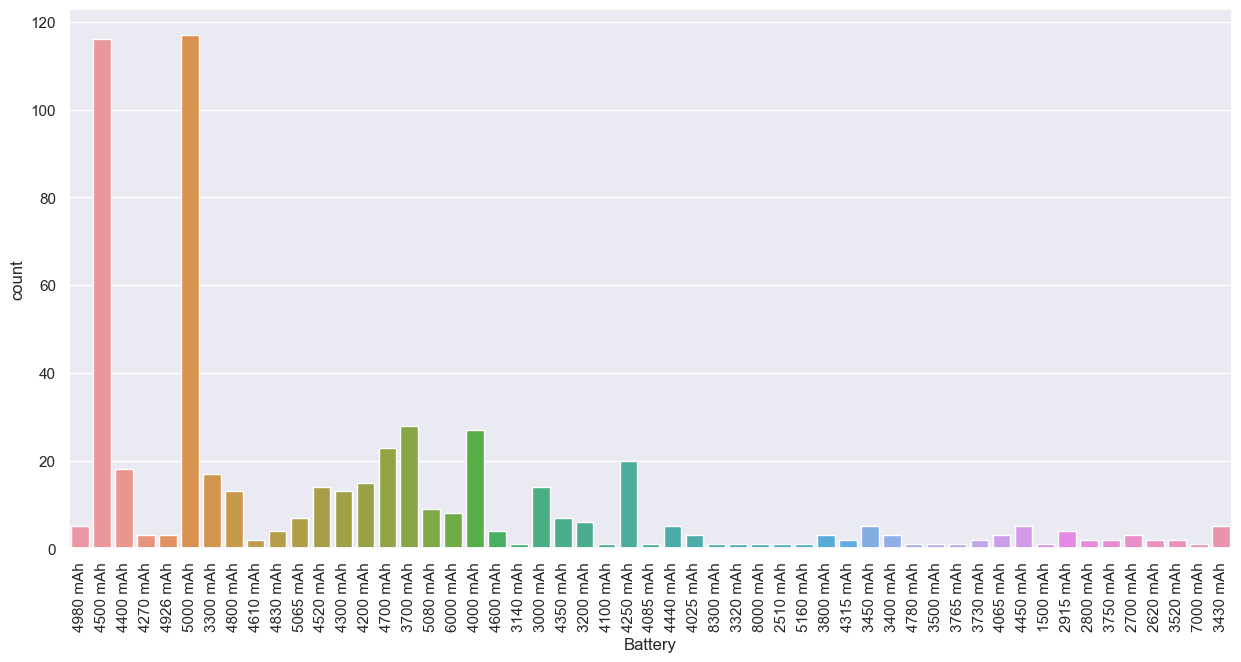

In [70]:
plt.figure(figsize = (15, 7))
sns.countplot(x= mobile_df.Battery)
plt.xticks(rotation=90)

Inference:
 - Majority of mobiles listed above Rs.30000 has the battery capacity between 4500mAh to 5000mAh .

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'A15'),
  Text(1, 0, 'A13'),
  Text(2, 0, 'Mediatek'),
  Text(3, 0, 'A14'),
  Text(4, 0, 'Qualcomm'),
  Text(5, 0, 'Tensor'),
  Text(6, 0, 'A16'),
  Text(7, 0, 'Exynos'),
  Text(8, 0, 'Octa'),
  Text(9, 0, 'Snapdragon'),
  Text(10, 0, 'A12'),
  Text(11, 0, 'A8'),
  Text(12, 0, 'A11'),
  Text(13, 0, 'A9'),
  Text(14, 0, 'Sdm710'),
  Text(15, 0, 'A10'),
  Text(16, 0, 'A7'),
  Text(17, 0, 'A6'),
  Text(18, 0, 'Kirin'),
  Text(19, 0, 'Intel')])

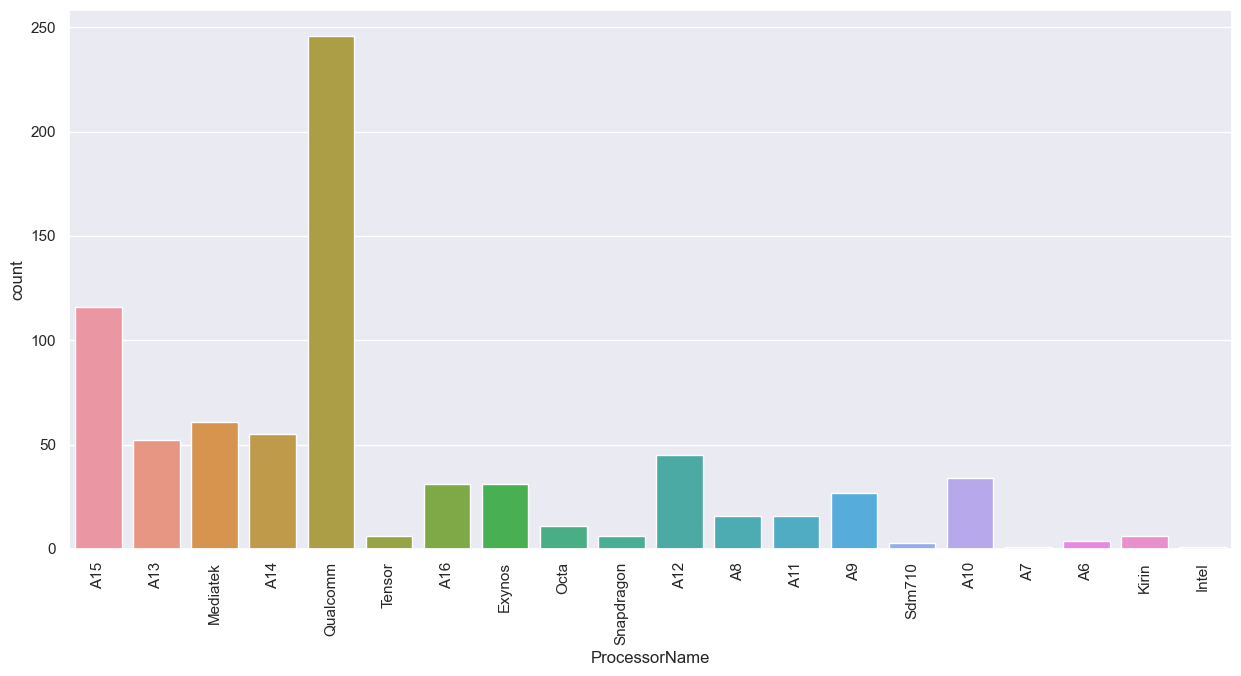

In [71]:
plt.figure(figsize = (15, 7))
sns.countplot(x= mobile_df.ProcessorName)
plt.xticks(rotation=90)

In [72]:
mobile_df.ProcessorName.value_counts()

Qualcomm      246
A15           116
Mediatek       61
A14            55
A13            52
A12            45
A10            34
A16            31
Exynos         31
A9             27
A8             16
A11            16
Octa           11
Snapdragon      6
Tensor          6
Kirin           6
A6              4
Sdm710          3
A7              1
Intel           1
Name: ProcessorName, dtype: int64

Inference:
- Majority of mobiles which priced above Rs.30,000 uses Qualcomm processor followed by A15, Mediatek, A14,etc.
- when we combine the processors from Apple mobiles including A16, A15, A14, A13, A12, A11, A6 listed on the website, makes up even more than the Qualcomm processor

In [73]:
mobile_df.head()

,Product Name,Price,Rating,Features,RAM,Storage,Battery,Screen Size,ScreenSize_cm,ScreenSize_inch,Processor,ProcessorName,Brand
0,"APPLE iPhone 14 (Blue, 128 GB)",66999.0,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor",A15,Apple
1,"APPLE iPhone 14 (Midnight, 128 GB)",66999.0,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor",A15,Apple
2,"APPLE iPhone 13 (Blue, 128 GB)",61999.0,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,A15 Bionic Chip,A15,Apple
3,"APPLE iPhone 14 (Starlight, 128 GB)",67999.0,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,NaN,128 GB ROM,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,"A15 Bionic Chip, 6 Core Processor",A15,Apple
4,"APPLE iPhone 11 (White, 64 GB)",38999.0,4.6,64 GB ROM15.49 cm (6.1 inch) Liquid Retina HD ...,NaN,64 GB ROM,NaN,"[15.49 cm, 6.1 inch]",15.49 cm,6.1 inch,A13 Bionic Chip,A13,Apple


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

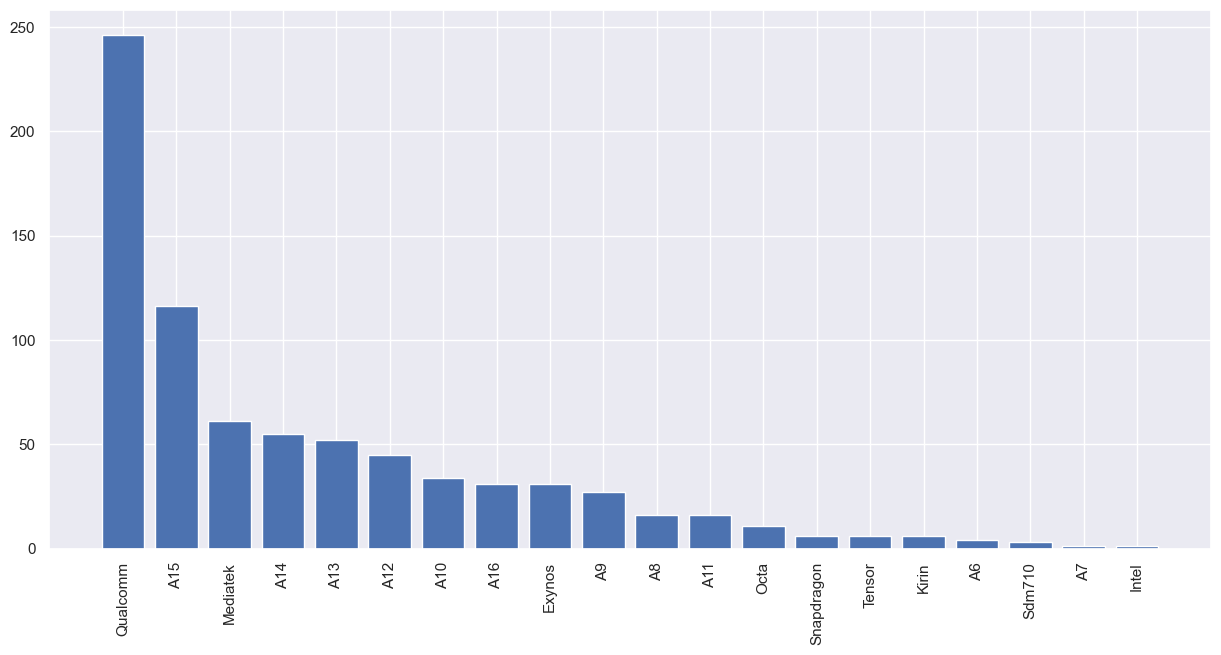

In [74]:
#bar plot
plt.figure(figsize = (15, 7))
x = mobile_df.ProcessorName.value_counts().index
y = mobile_df.ProcessorName.value_counts().values
plt.bar(x=x, height=y)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

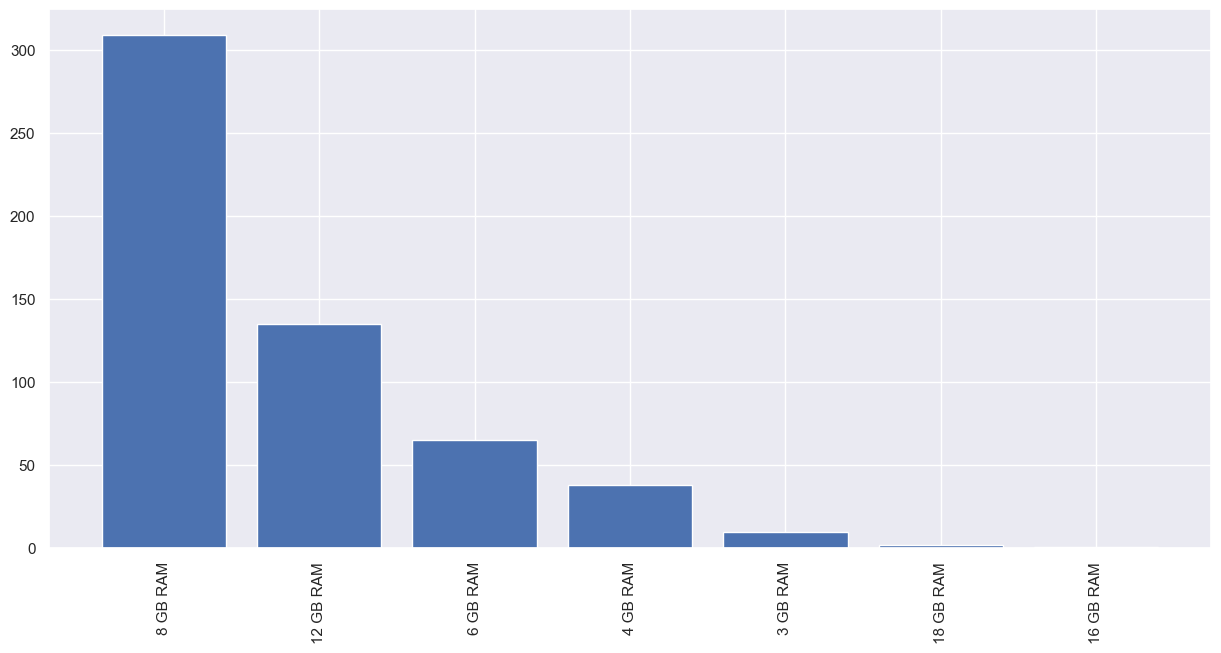

In [75]:
plt.figure(figsize = (15, 7))
x = mobile_df.RAM.value_counts().index
y = mobile_df.RAM.value_counts().values
plt.bar(x=x, height=y)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

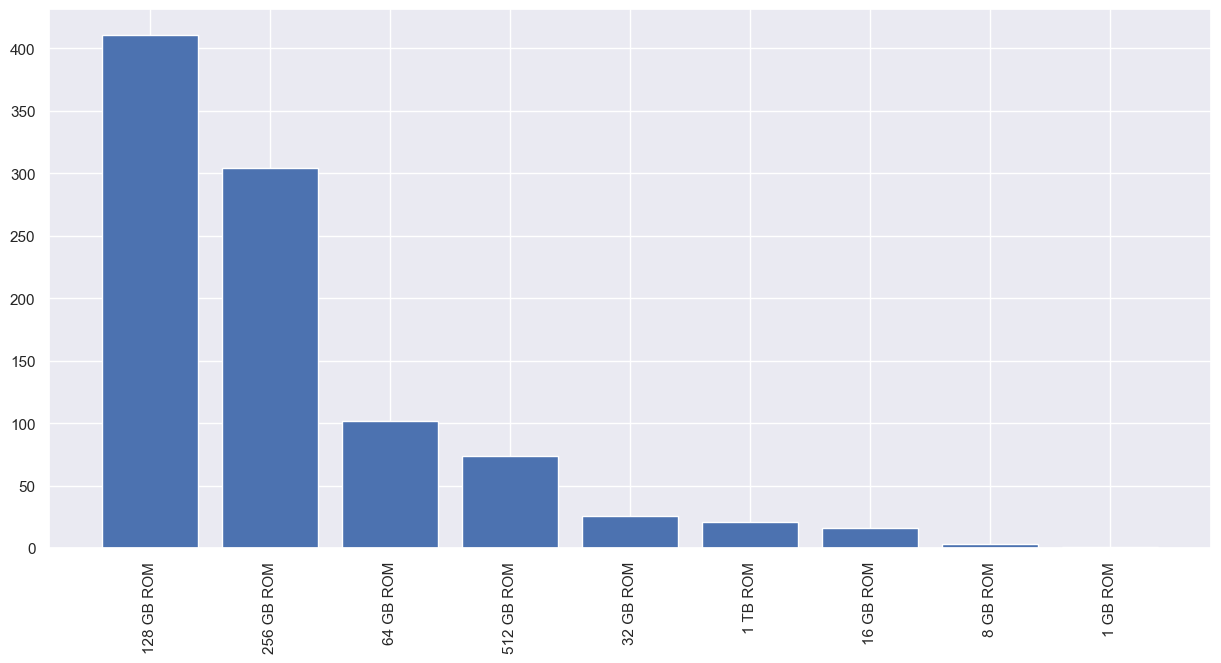

In [76]:
plt.figure(figsize = (15, 7))
x = mobile_df.Storage.value_counts().index
y = mobile_df.Storage.value_counts().values
plt.bar(x=x, height=y)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

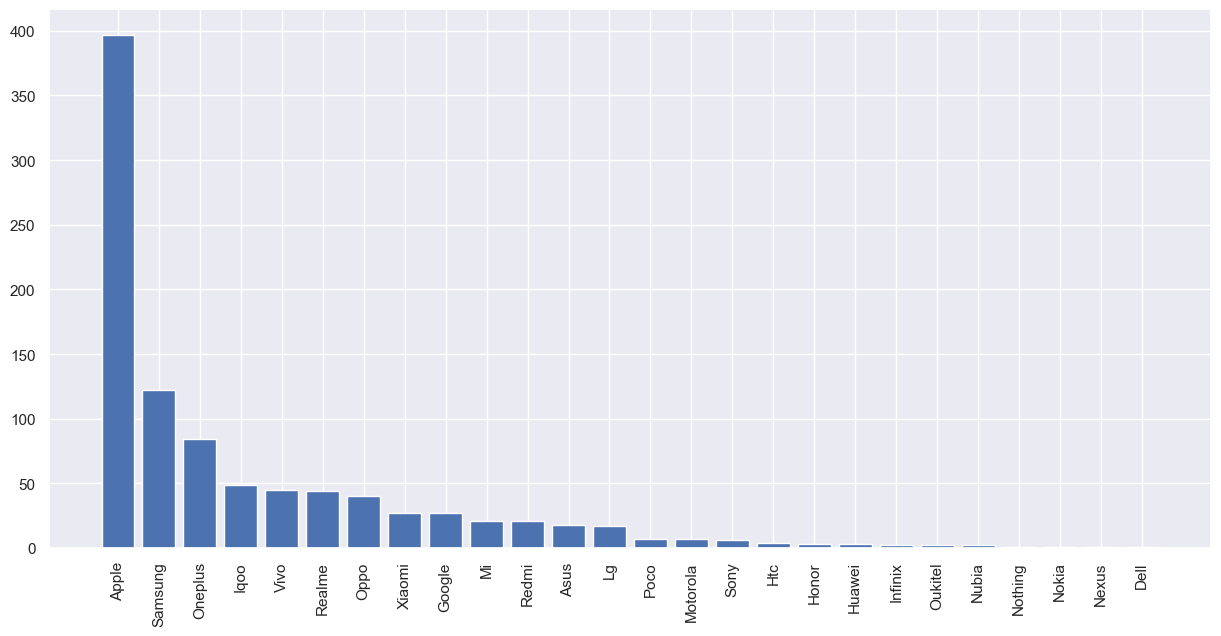

In [77]:
plt.figure(figsize = (15, 7))
x = mobile_df.Brand.value_counts().index
y = mobile_df.Brand.value_counts().values
plt.bar(x=x, height=y)
plt.xticks(rotation=90)

([<matplotlib.patches.Wedge at 0x2d5a922c6a0>,
 [Text(0.28353201845063447, 1.0628309341157272, 'Apple'),
  Text(-1.0922467703520107, 0.1303725149546572, 'Samsung'),
  Text(-0.931396597625023, -0.5852353184254445, 'Oneplus'),
  Text(-0.5944272170998972, -0.9255572827064092, 'Iqoo'),
  Text(-0.2835319562572505, -1.06283095070709, 'Vivo'),
  Text(0.03629338924083991, -1.0994011051010515, 'Realme'),
  Text(0.3357733133713244, -1.0475000152876575, 'Oppo'),
  Text(0.557318905249451, -0.9483647177386734, 'Xiaomi'),
  Text(0.7165986323500254, -0.8345576074268769, 'Google'),
  Text(0.8392690360744722, -0.7110748800841065, 'Mi'),
  Text(0.9294603231940454, -0.5883056243212544, 'Redmi'),
  Text(0.9972792454080475, -0.4641487979930095, 'Asus'),
  Text(1.04412464031887, -0.3461267621536805, 'Lg'),
  Text(1.0682361844544448, -0.2624337139588008, 'Poco'),
  Text(1.0792164461411062, -0.21281884873892348, 'Motorola'),
  Text(1.0873506098456542, -0.1663389649729847, 'Sony'),
  Text(1.0922467808418441, -

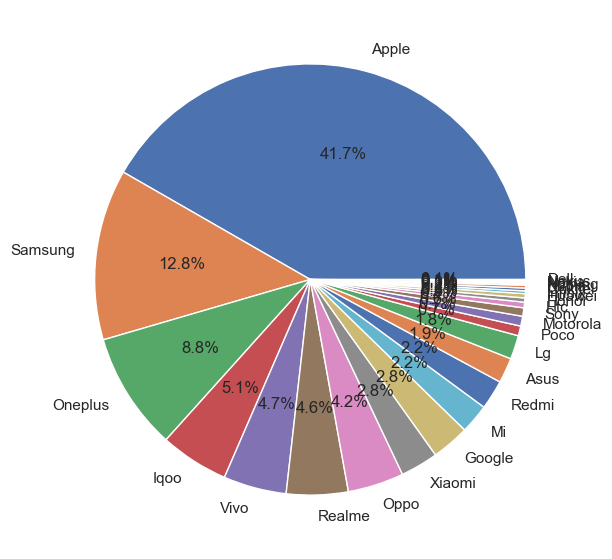

In [78]:
plt.figure(figsize = (15, 7))
counts = mobile_df['Brand'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')

Inference:
 - More than 40% of All the mobiles listed on the flipkart website priced above Rs.30,000 belong to Apple brand.

([<matplotlib.patches.Wedge at 0x2d5a9a50d90>,
 [Text(-0.17817015903456776, 1.0854747322851863, '8 GB RAM'),
  Text(-0.5158132410500198, -0.9715640485101713, '12 GB RAM'),
  Text(0.6515459861313168, -0.8862775118190521, '6 GB RAM'),
  Text(1.0298583478812824, -0.3865123326612435, '4 GB RAM'),
  Text(1.0955717221913186, -0.09860325316513817, '3 GB RAM'),
  Text(1.0997230581989632, -0.024681881320514496, '18 GB RAM'),
  Text(1.099982690412479, -0.006170963694957132, '16 GB RAM')],
 [Text(-0.09718372310976423, 0.5920771267010106, '55.2%'),
  Text(-0.2813526769363744, -0.5299440264600934, '24.1%'),
  Text(0.35538871970799096, -0.48342409735584657, '11.6%'),
  Text(0.5617409170261539, -0.2108249087243146, '6.8%'),
  Text(0.5975845757407192, -0.053783592635529905, '1.8%'),
  Text(0.5998489408357981, -0.01346284435664427, '0.4%'),
  Text(0.5999905584068067, -0.003365980197249344, '0.2%')])

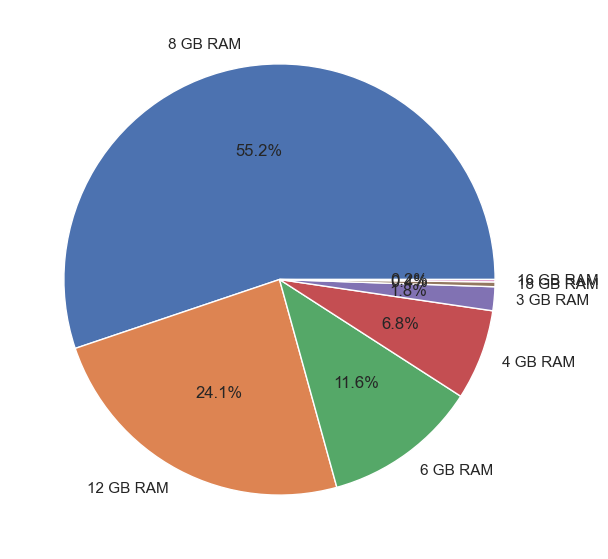

In [79]:
plt.figure(figsize = (15, 7))
counts = mobile_df['RAM'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')

Inference:
 - More than 55% of All the mobiles listed on the flipkart website priced above Rs.30,000 belong uses 8 GB RAM.

([<matplotlib.patches.Wedge at 0x2d5a97d08b0>,
 [Text(0.24326555818715606, 1.0727636590600427, '128 GB ROM'),
  Text(-0.9372438623488294, -0.5758245761422905, '256 GB ROM'),
  Text(0.3371730075767789, -1.0470503153915907, '64 GB ROM'),
  Text(0.8538760021066832, -0.6934664901971167, '512 GB ROM'),
  Text(1.0317292829876212, -0.3814900871921172, '32 GB ROM'),
  Text(1.0780647675812753, -0.2185780338916308, '1 TB ROM'),
  Text(1.0965949043994108, -0.08648477117532068, '16 GB ROM'),
  Text(1.0998521369299474, -0.018035434306614542, '8 GB ROM'),
  Text(1.0999940854573762, -0.0036072092801371215, '1 GB ROM')],
 [Text(0.13269030446572147, 0.5851438140327505, '42.9%'),
  Text(-0.5112239249175433, -0.3140861324412494, '31.7%'),
  Text(0.18391254958733394, -0.5711183538499585, '10.6%'),
  Text(0.46575054660364534, -0.37825444919842727, '7.7%'),
  Text(0.562761427084157, -0.20808550210479118, '2.7%'),
  Text(0.5880353277716046, -0.1192243821227077, '2.2%'),
  Text(0.5981426751269512, -0.04717351

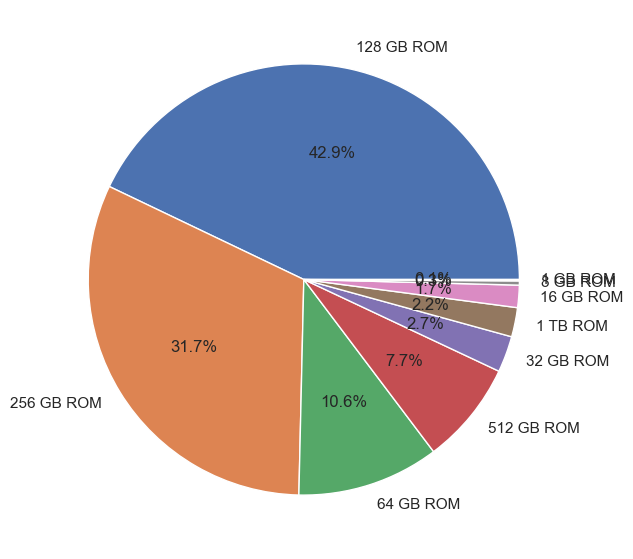

In [80]:
plt.figure(figsize = (15, 7))
counts = mobile_df['Storage'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')

Inference:
 - More than 40% of All the mobiles listed on the flipkart website priced above Rs.30,000 has a minimum of 128 GB Storage.

In [81]:
mobile_df.describe()

,Price,Rating
count,959.000000,922.000000
mean,63724.263816,4.392408
std,38039.704799,0.255550
min,30049.000000,2.800000
25%,35647.000000,4.300000
50%,48364.000000,4.400000
75%,77000.000000,4.600000
max,182999.000000,5.000000


In [82]:
mobile_df.groupby('Brand')['Price'].min('Price')

Brand
Apple       30780.0
Asus        32999.0
Dell        34990.0
Google      31999.0
Honor       35999.0
Htc         53990.0
Huawei      39999.0
Infinix     36999.0
Iqoo        30490.0
Lg          42021.0
Mi          30099.0
Motorola    34999.0
Nexus       42998.0
Nokia       56299.0
Nothing     35999.0
Nubia       38999.0
Oneplus     30999.0
Oppo        30299.0
Oukitel     36799.0
Poco        32999.0
Realme      30049.0
Redmi       30450.0
Samsung     30499.0
Sony        35000.0
Vivo        30990.0
Xiaomi      30999.0
Name: Price, dtype: float64

In [83]:
mobile_df.groupby('Brand')['Price'].max('Price')

Brand
Apple       182999.0
Asus         79999.0
Dell         34990.0
Google       92000.0
Honor        35999.0
Htc          53990.0
Huawei       39999.0
Infinix      36999.0
Iqoo         54499.0
Lg           60000.0
Mi           54999.0
Motorola    149999.0
Nexus        42998.0
Nokia        56299.0
Nothing      35999.0
Nubia        39999.0
Oneplus      66999.0
Oppo         60990.0
Oukitel      48364.0
Poco         36999.0
Realme       57999.0
Redmi        32999.0
Samsung     156999.0
Sony         44990.0
Vivo         79999.0
Xiaomi       53999.0
Name: Price, dtype: float64

In [84]:
mobile_df.groupby('Brand').agg({'Price' : ['min', 'max', 'mean']})

Price                        
              min       max          mean
Brand                                    
Apple     30780.0  182999.0  87807.007557
Asus      32999.0   79999.0  47849.000000
Dell      34990.0   34990.0  34990.000000
Google    31999.0   92000.0  70332.962963
Honor     35999.0   35999.0  35999.000000
Htc       53990.0   53990.0  53990.000000
Huawei    39999.0   39999.0  39999.000000
Infinix   36999.0   36999.0  36999.000000
Iqoo      30490.0   54499.0  37927.693878
Lg        42021.0   60000.0  53682.352941
Mi        30099.0   54999.0  35417.476190
Motorola  34999.0  149999.0  59999.000000
Nexus     42998.0   42998.0  42998.000000
Nokia     56299.0   56299.0  56299.000000
Nothing   35999.0   35999.0  35999.000000
Nubia     38999.0   39999.0  39499.000000
Oneplus   30999.0   66999.0  41481.289157
Oppo      30299.0   60990.0  39025.200000
Oukitel   36799.0   48364.0  42581.500000
Poco      32999.0   36999.0  34999.000000
Realme    30049.0   57999.0  38069.454545
Redmi     30450.0   32999.0  31866.761905
Samsung   30499.0  156999.0  63526.049180
Sony      35000.0   44990.0  38292.500000
Vivo      30990.0   79999.0  41102.711111
Xiaomi    30999.0   53999.0  37665.185185

In [85]:
mobile_df.groupby(['Brand'])['Price'].max()

Brand
Apple       182999.0
Asus         79999.0
Dell         34990.0
Google       92000.0
Honor        35999.0
Htc          53990.0
Huawei       39999.0
Infinix      36999.0
Iqoo         54499.0
Lg           60000.0
Mi           54999.0
Motorola    149999.0
Nexus        42998.0
Nokia        56299.0
Nothing      35999.0
Nubia        39999.0
Oneplus      66999.0
Oppo         60990.0
Oukitel      48364.0
Poco         36999.0
Realme       57999.0
Redmi        32999.0
Samsung     156999.0
Sony         44990.0
Vivo         79999.0
Xiaomi       53999.0
Name: Price, dtype: float64

<AxesSubplot:xlabel='Brand'>

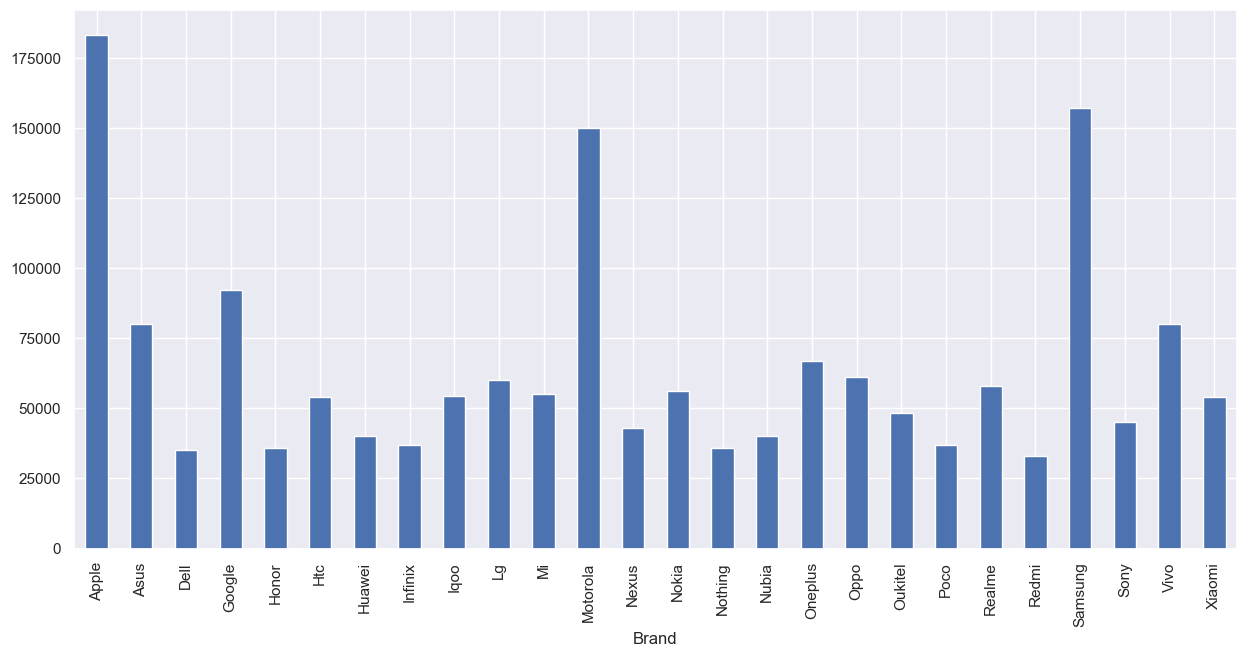

In [86]:
mobile_df.groupby(['Brand'])['Price'].max().plot(kind = 'bar')

<AxesSubplot:xlabel='Brand'>

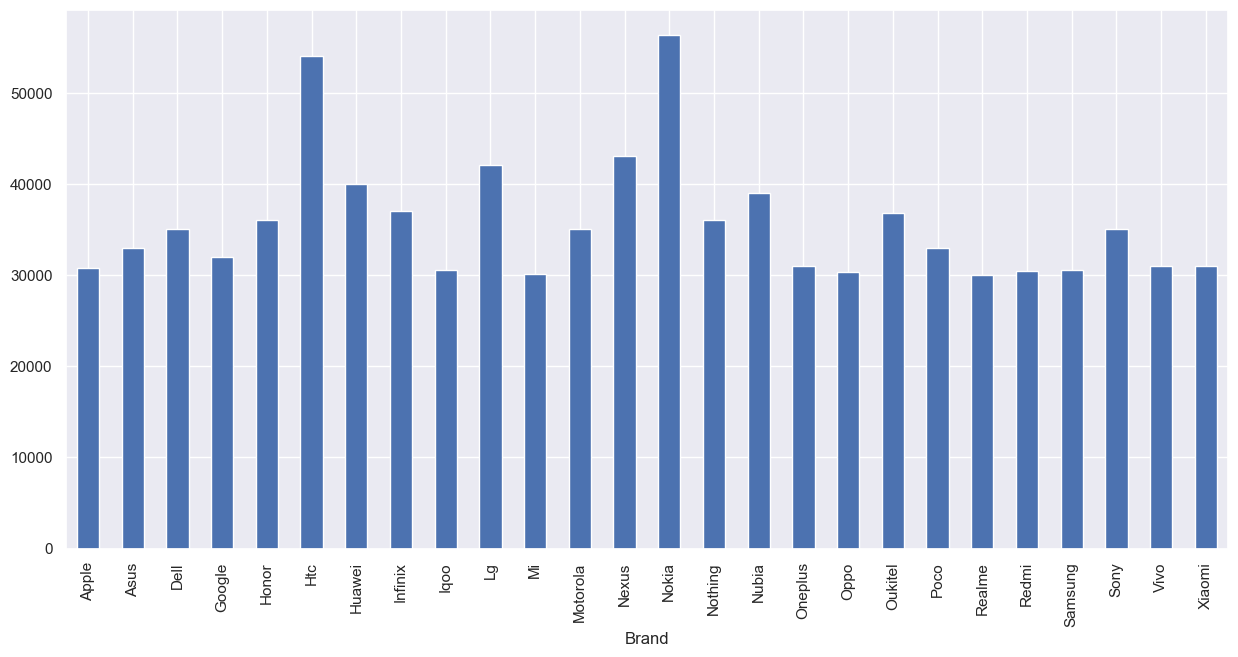

In [87]:
mobile_df.groupby(['Brand'])['Price'].min().plot(kind = 'bar')

<AxesSubplot:xlabel='Brand'>

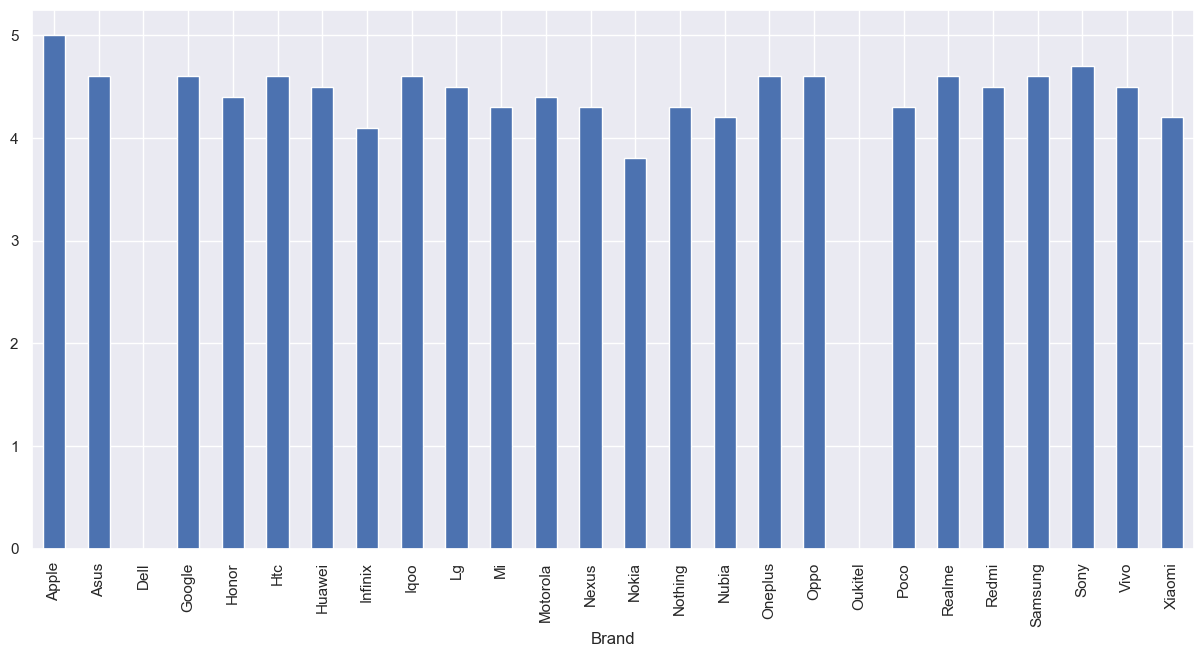

In [88]:
mobile_df.groupby(['Brand'])['Rating'].max().plot(kind='bar')

In [89]:
mobile_df.groupby(['Brand'])['Price'].mean()

Brand
Apple       87807.007557
Asus        47849.000000
Dell        34990.000000
Google      70332.962963
Honor       35999.000000
Htc         53990.000000
Huawei      39999.000000
Infinix     36999.000000
Iqoo        37927.693878
Lg          53682.352941
Mi          35417.476190
Motorola    59999.000000
Nexus       42998.000000
Nokia       56299.000000
Nothing     35999.000000
Nubia       39499.000000
Oneplus     41481.289157
Oppo        39025.200000
Oukitel     42581.500000
Poco        34999.000000
Realme      38069.454545
Redmi       31866.761905
Samsung     63526.049180
Sony        38292.500000
Vivo        41102.711111
Xiaomi      37665.185185
Name: Price, dtype: float64

In [90]:
pd.pivot_table(mobile_df,index='Brand')

,Price,Rating
Brand,,
Apple,87807.007557,4.566751
Asus,47849.000000,4.344444
Dell,34990.000000,NaN
Google,70332.962963,4.522222
Honor,35999.000000,4.400000
Htc,53990.000000,4.600000
Huawei,39999.000000,4.500000
Infinix,36999.000000,4.100000
Iqoo,37927.693878,4.230952


In [91]:
pd.pivot_table(mobile_df,index='Brand').max()

Price     87807.007557
Rating        4.600000
dtype: float64

In [92]:
pd.pivot_table(mobile_df,index='Brand').min()

Price     31866.761905
Rating        3.800000
dtype: float64

In [93]:
pd.pivot_table(mobile_df,index='Brand').mean()

Price     45322.967100
Rating        4.284218
dtype: float64

In [94]:
pd.pivot_table(mobile_df,index='RAM')

,Price,Rating
RAM,,
12 GB RAM,57469.798507,4.219512
16 GB RAM,54900.000000,3.900000
18 GB RAM,79999.000000,4.500000
3 GB RAM,41898.600000,4.350000
4 GB RAM,62156.210526,4.402632
6 GB RAM,39073.184615,4.237705
8 GB RAM,41779.521036,4.260417


In [95]:
pd.pivot_table(mobile_df,index='Storage')

,Price,Rating
Storage,,
1 GB ROM,35795.000000,3.900000
1 TB ROM,175227.285714,4.633333
128 GB ROM,49512.627737,4.341582
16 GB ROM,47124.687500,4.431250
256 GB ROM,64905.016502,4.373776
32 GB ROM,40589.884615,4.407692
512 GB ROM,129502.256757,4.537838
64 GB ROM,56912.764706,4.491176
8 GB ROM,37500.000000,3.900000


In [96]:
pd.pivot_table(mobile_df,index='ProcessorName')

,Price,Rating
ProcessorName,,
A10,51026.470588,4.526471
A11,72981.250000,4.575000
A12,85477.777778,4.617778
A13,83361.307692,4.594231
A14,81797.563636,4.529091
A15,104639.086207,4.600000
A16,150740.935484,4.700000
A6,41500.000000,3.900000
A7,35000.000000,4.400000


In [97]:
pd.pivot_table(mobile_df,index='ScreenSize_inch')

,Price,Rating
ScreenSize_inch,,
4.7 inch,51133.385714,4.464286
5.1 inch,46000.000000,4.400000
5.2 inch,40195.400000,4.380000
5.3 inch,52990.000000,4.000000
5.4 inch,62099.470588,4.500000
5.488 inch,40207.692308,4.500000
5.5 inch,61635.000000,4.478723
5.6 inch,39999.000000,4.500000
5.7 inch,53833.000000,4.200000


In [98]:
pd.pivot_table(mobile_df,index=['RAM','Storage'])

Price    Rating
RAM       Storage                            
12 GB RAM 128 GB ROM   60284.375000  4.375000
          256 GB ROM   53468.191667  4.244954
          512 GB ROM  133749.166667  3.550000
16 GB RAM 256 GB ROM   54900.000000  3.900000
18 GB RAM 512 GB ROM   79999.000000  4.500000
3 GB RAM  16 GB ROM    44502.750000  4.425000
          32 GB ROM    39999.000000  4.500000
          64 GB ROM    40326.000000  4.100000
4 GB RAM  128 GB ROM   79090.909091  4.527273
          32 GB ROM    57196.000000  4.280000
          64 GB ROM    54816.181818  4.368182
6 GB RAM  128 GB ROM   38179.333333  4.219643
          64 GB ROM    49799.400000  4.440000
8 GB RAM  128 GB ROM   39804.462222  4.249048
          256 GB ROM   47069.857143  4.291026

In [99]:
pd.pivot_table(mobile_df,index=['RAM','Storage'], values=['Price'])

Price
RAM       Storage                  
12 GB RAM 128 GB ROM   60284.375000
          256 GB ROM   53468.191667
          512 GB ROM  133749.166667
16 GB RAM 256 GB ROM   54900.000000
18 GB RAM 512 GB ROM   79999.000000
3 GB RAM  16 GB ROM    44502.750000
          32 GB ROM    39999.000000
          64 GB ROM    40326.000000
4 GB RAM  128 GB ROM   79090.909091
          32 GB ROM    57196.000000
          64 GB ROM    54816.181818
6 GB RAM  128 GB ROM   38179.333333
          64 GB ROM    49799.400000
8 GB RAM  128 GB ROM   39804.462222
          256 GB ROM   47069.857143

<AxesSubplot:xlabel='RAM,Storage'>

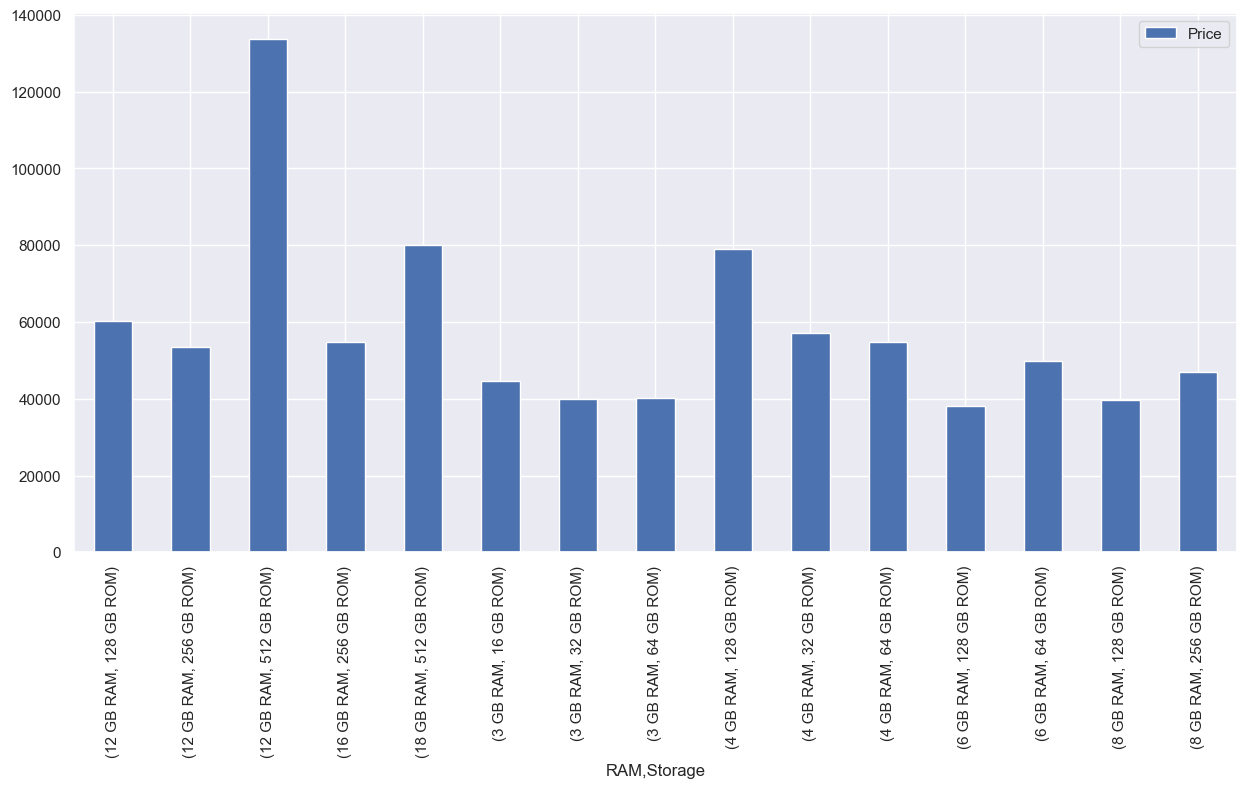

In [100]:
pd.pivot_table(mobile_df,index=['RAM','Storage'], values=['Price']).plot(kind='bar')

Inference:
 - The mobiles with 12 GB RAM,512 GB Storage has the highest mean price.

In [101]:
pd.pivot_table(mobile_df,index=['RAM','Storage'], values=['Price','Rating'], aggfunc=np.mean)

Price    Rating
RAM       Storage                            
12 GB RAM 128 GB ROM   60284.375000  4.375000
          256 GB ROM   53468.191667  4.244954
          512 GB ROM  133749.166667  3.550000
16 GB RAM 256 GB ROM   54900.000000  3.900000
18 GB RAM 512 GB ROM   79999.000000  4.500000
3 GB RAM  16 GB ROM    44502.750000  4.425000
          32 GB ROM    39999.000000  4.500000
          64 GB ROM    40326.000000  4.100000
4 GB RAM  128 GB ROM   79090.909091  4.527273
          32 GB ROM    57196.000000  4.280000
          64 GB ROM    54816.181818  4.368182
6 GB RAM  128 GB ROM   38179.333333  4.219643
          64 GB ROM    49799.400000  4.440000
8 GB RAM  128 GB ROM   39804.462222  4.249048
          256 GB ROM   47069.857143  4.291026

In [102]:
pd.pivot_table(mobile_df,index=['Storage','Brand'], values=['Price','Rating'], aggfunc=np.mean)

Price    Rating
Storage    Brand                            
1 GB ROM   Sony       35795.000000  3.900000
1 TB ROM   Apple     175227.285714  4.633333
128 GB ROM Apple      72435.990654  4.565421
           Asus       41859.000000  4.360000
           Google     74058.411765  4.511765
           Honor      35999.000000  4.400000
           Htc        53990.000000  4.600000
           Iqoo       38010.000000  4.145000
           Lg         56919.800000  4.380000
           Mi         35043.000000  4.133333
           Motorola   59999.000000  4.100000
           Nokia      56299.000000  3.800000
           Nubia      39499.000000  4.200000
           Oneplus    38794.844444  4.290476
           Oppo       35387.809524  4.285714
           Oukitel    42581.500000       NaN
           Poco       34199.000000  4.300000
           Realme     37039.000000  4.312000
           Redmi      31574.000000  4.233333
           Samsung    43838.600000  4.208824
           Vivo       36046.555556  4.388889
           Xiaomi     32112.600000  4.173333
16 GB ROM  Apple      47998.666667  4.433333
           Lg         47340.333333  4.500000
           Sony       35990.000000  4.200000
256 GB ROM Apple      94298.663265  4.587755
           Asus       47665.666667  4.350000
           Infinix    36999.000000  4.100000
           Iqoo       37848.680000  4.309091
           Mi         37664.333333  4.000000
           Motorola   59999.000000  4.200000
           Nothing    35999.000000  4.300000
           Oneplus    44662.605263  4.190625
           Oppo       44463.764706  4.376471
           Poco       36999.000000  4.300000
           Realme     39425.315789  4.326316
           Redmi      31983.866667  4.400000
           Samsung    93272.138889  4.127273
           Vivo       44473.481481  4.370370
           Xiaomi     44605.916667  4.125000
32 GB ROM  Apple      36075.555556  4.427778
           Google     67000.000000  4.500000
           Huawei     39999.000000  4.500000
           Lg         52990.000000  4.000000
           Samsung    46000.000000  4.400000
512 GB ROM Apple     130616.272727  4.628788
           Asus       74332.333333  4.533333
           Samsung   147899.200000  3.340000
64 GB ROM  Apple      58738.486111  4.548611
           Asus       35749.000000  4.175000
           Google     63249.625000  4.550000
           Lg         54285.714286  4.271429
           Nexus      42998.000000  4.300000
           Oppo       30990.000000  4.300000
           Samsung    63798.000000  4.500000
           Sony       40990.000000  4.066667
8 GB ROM   Apple      37500.000000  3.900000

In [103]:
pd.pivot_table(mobile_df,index=['Storage','Brand'], values=['Price','Rating'], aggfunc=np.min)

Price  Rating
Storage    Brand                     
1 GB ROM   Sony       35795.0     3.9
1 TB ROM   Apple     169900.0     4.6
128 GB ROM Apple      34900.0     4.3
           Asus       36299.0     4.1
           Google     31999.0     4.4
           Honor      35999.0     4.4
           Htc        53990.0     4.6
           Iqoo       30490.0     3.9
           Lg         54599.0     4.3
           Mi         30099.0     4.0
           Motorola   34999.0     3.7
           Nokia      56299.0     3.8
           Nubia      38999.0     4.2
           Oneplus    30999.0     3.9
           Oppo       30299.0     4.1
           Oukitel    36799.0     NaN
           Poco       32999.0     4.3
           Realme     31999.0     4.1
           Redmi      30450.0     4.2
           Samsung    30499.0     3.2
           Vivo       30990.0     4.3
           Xiaomi     30999.0     4.0
16 GB ROM  Apple      31999.0     4.4
           Lg         42021.0     4.5
           Sony       35990.0     4.2
256 GB ROM Apple      54900.0     4.3
           Asus       43999.0     4.2
           Infinix    36999.0     4.1
           Iqoo       30990.0     3.9
           Mi         32995.0     4.0
           Motorola   59999.0     4.2
           Nothing    35999.0     4.3
           Oneplus    32990.0     3.6
           Oppo       34999.0     4.2
           Poco       36999.0     4.3
           Realme     30049.0     4.1
           Redmi      30590.0     4.3
           Samsung    36499.0     2.8
           Vivo       30990.0     4.2
           Xiaomi     33999.0     4.0
32 GB ROM  Apple      30780.0     3.9
           Google     67000.0     4.5
           Huawei     39999.0     4.5
           Lg         52990.0     4.0
           Samsung    46000.0     4.4
512 GB ROM Apple      91999.0     4.5
           Asus       62999.0     4.4
           Samsung   118999.0     2.8
64 GB ROM  Apple      38999.0     4.3
           Asus       32999.0     3.6
           Google     39999.0     4.5
           Lg         50000.0     4.1
           Nexus      42998.0     4.3
           Oppo       30990.0     4.3
           Samsung    49990.0     4.4
           Sony       38990.0     4.0
8 GB ROM   Apple      37500.0     3.9

In [104]:
pd.pivot_table(mobile_df, index=['Brand'], columns= ['RAM'], values=['Price'], aggfunc=np.mean)

Price                                              \
RAM           12 GB RAM 16 GB RAM 18 GB RAM      3 GB RAM  4 GB RAM   
Brand                                                                 
Asus       54249.000000       NaN   79999.0           NaN  37999.00   
Google     81999.000000       NaN       NaN           NaN  72499.85   
Honor               NaN       NaN       NaN           NaN       NaN   
Htc                 NaN       NaN       NaN           NaN       NaN   
Huawei              NaN       NaN       NaN  39999.000000       NaN   
Infinix             NaN       NaN       NaN           NaN       NaN   
Iqoo       38445.086957       NaN       NaN           NaN       NaN   
Lg                  NaN       NaN       NaN  47340.333333  54598.00   
Mi                  NaN       NaN       NaN           NaN       NaN   
Motorola   59999.000000       NaN       NaN           NaN       NaN   
Nexus               NaN       NaN       NaN  42998.000000       NaN   
Nokia               NaN       NaN       NaN           NaN       NaN   
Nothing    35999.000000       NaN       NaN           NaN       NaN   
Nubia               NaN       NaN       NaN           NaN       NaN   
Oneplus    43008.294118   54900.0       NaN           NaN       NaN   
Oppo       41746.750000       NaN       NaN           NaN  30990.00   
Oukitel             NaN       NaN       NaN           NaN       NaN   
Poco                NaN       NaN       NaN           NaN       NaN   
Realme     42415.666667       NaN       NaN           NaN       NaN   
Redmi      32999.000000       NaN       NaN           NaN       NaN   
Samsung   122201.260870       NaN       NaN           NaN  55247.50   
Sony                NaN       NaN       NaN  37990.000000  44990.00   
Vivo       47126.933333       NaN       NaN           NaN       NaN   
Xiaomi     45992.000000       NaN       NaN           NaN       NaN   

                                       
RAM            6 GB RAM      8 GB RAM  
Brand                                  
Asus       36059.000000  44332.333333  
Google     31999.000000  56999.000000  
Honor      35999.000000           NaN  
Htc        53990.000000           NaN  
Huawei              NaN           NaN  
Infinix             NaN  36999.000000  
Iqoo                NaN  37470.000000  
Lg         56149.750000           NaN  
Mi         34195.400000  35799.375000  
Motorola  149999.000000  37499.000000  
Nexus               NaN           NaN  
Nokia      56299.000000           NaN  
Nothing             NaN           NaN  
Nubia               NaN  39499.000000  
Oneplus             NaN  40120.104167  
Oppo       41990.000000  38726.344828  
Oukitel             NaN  42581.500000  
Poco       32999.000000  35799.000000  
Realme              NaN  36439.625000  
Redmi      31574.000000  31730.083333  
Samsung    35832.300000  53358.840000  
Sony                NaN           NaN  
Vivo       33990.000000  38721.461538  
Xiaomi     31332.333333  36867.600000

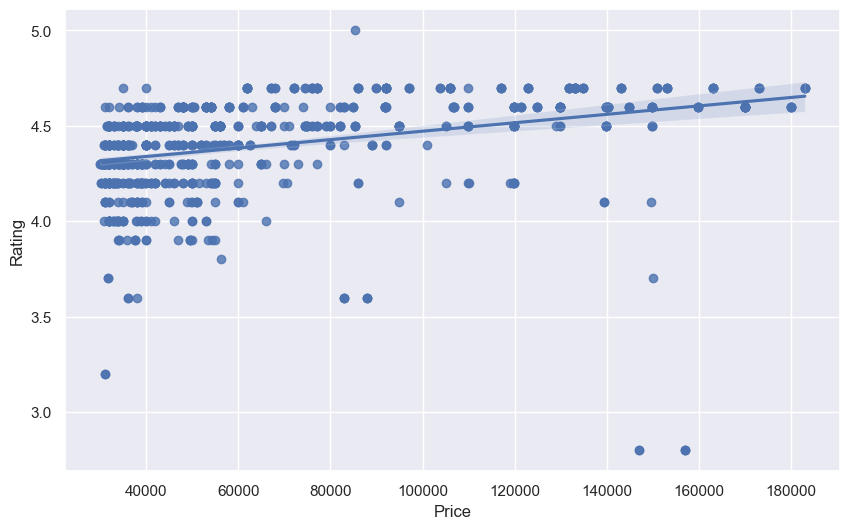

In [105]:
plt.figure(figsize=(10,6))
sns.regplot(x=mobile_df['Price'], y=mobile_df['Rating'])
plt.show()

The above graph shows there is a low positive correlation between price and rating.

In [106]:
x = mobile_df['Price']
y =mobile_df['Rating']
correlation = y.corr(x)

In [107]:
correlation

0.33316675002032875

In [108]:
pd.crosstab(mobile_df['ProcessorName'], mobile_df['Brand'])

Brand,Apple,Asus,Google,Honor,Htc,Huawei,Infinix,Iqoo,Lg,Mi,...,Oneplus,Oppo,Oukitel,Poco,Realme,Redmi,Samsung,Sony,Vivo,Xiaomi
ProcessorName,,,,,,,,,,,,,,,,,,,,,
A10,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A11,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A12,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A13,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A14,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A15,116,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A16,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
pd.crosstab(mobile_df['ProcessorName'], mobile_df['Brand'])

Brand,Apple,Asus,Google,Honor,Htc,Huawei,Infinix,Iqoo,Lg,Mi,...,Oneplus,Oppo,Oukitel,Poco,Realme,Redmi,Samsung,Sony,Vivo,Xiaomi
ProcessorName,,,,,,,,,,,,,,,,,,,,,
A10,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A11,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A12,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A13,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A14,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A15,116,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A16,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
mobile_df.groupby(by=['Brand', 'Storage'])['Product Name'].count()

Brand     Storage   
Apple     1 TB ROM       21
          128 GB ROM    107
          16 GB ROM      12
          256 GB ROM     98
          32 GB ROM      18
          512 GB ROM     66
          64 GB ROM      72
          8 GB ROM        3
Asus      128 GB ROM      5
          256 GB ROM      6
          512 GB ROM      3
          64 GB ROM       4
Google    128 GB ROM     17
          32 GB ROM       2
          64 GB ROM       8
Honor     128 GB ROM      3
Htc       128 GB ROM      4
Huawei    32 GB ROM       3
Infinix   256 GB ROM      2
Iqoo      128 GB ROM     24
          256 GB ROM     25
Lg        128 GB ROM      5
          16 GB ROM       3
          32 GB ROM       2
          64 GB ROM       7
Mi        128 GB ROM     18
          256 GB ROM      3
Motorola  128 GB ROM      5
          256 GB ROM      2
Nexus     64 GB ROM       1
Nokia     128 GB ROM      1
Nothing   256 GB ROM      1
Nubia     128 GB ROM      2
Oneplus   128 GB ROM     45
          256 GB ROM     39

In [111]:
pd.crosstab(mobile_df['Brand'], mobile_df['ProcessorName'], values=mobile_df['Price'], aggfunc='mean')

ProcessorName,A10,A11,A12,A13,A14,A15,A16,A6,A7,A8,A9,Exynos,Intel,Kirin,Mediatek,Octa,Qualcomm,Sdm710,Snapdragon,Tensor
Brand,,,,,,,,,,,,,,,,,,,,
Apple,51026.470588,72981.25,85477.777778,83361.307692,81797.563636,104639.086207,150740.935484,41500.0,35000.0,49002.625,54832.703704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Asus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37999.0,NaN,NaN,NaN,48428.411765,NaN,NaN,NaN
Google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70571.238095,NaN,NaN,69499.0
Honor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35999.0,NaN,NaN,NaN,NaN,NaN,NaN
Htc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53990.000000,NaN,NaN,NaN
Huawei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39999.0,NaN,NaN,NaN,NaN,NaN,NaN
Infinix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36999.000000,NaN,NaN,NaN,NaN,NaN
Iqoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40990.000000,NaN,NaN,NaN
Lg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53682.352941,NaN,NaN,NaN


In [112]:
pd.crosstab(mobile_df['Brand'], mobile_df['ProcessorName'], values=mobile_df['Rating'], aggfunc='mean')

ProcessorName,A10,A11,A12,A13,A14,A15,A16,A6,A7,A8,A9,Exynos,Intel,Kirin,Mediatek,Octa,Qualcomm,Sdm710,Snapdragon,Tensor
Brand,,,,,,,,,,,,,,,,,,,,
Apple,4.526471,4.575,4.617778,4.594231,4.529091,4.6,4.7,3.9,4.4,4.43125,4.440741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Asus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,NaN,NaN,NaN,4.388235,NaN,NaN,NaN
Google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.542857,NaN,NaN,4.45
Honor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4,NaN,NaN,NaN,NaN,NaN,NaN
Htc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.600000,NaN,NaN,NaN
Huawei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN
Infinix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.100000,NaN,NaN,NaN,NaN,NaN
Iqoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.466667,NaN,NaN,NaN
Lg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.311765,NaN,NaN,NaN


### Interpretations Summary:
The following are the inferences from the mobile dataset:
 - Most mobiles listed for Rs.30000 and above has the rating of 4+ & a minimum of 32 GB storage while more number of mobiles come with 8GB RAM followed by 12GB.
 - Mobiles which are priced above Rs.1,00,000 belongs to Apple, Samsung and Motorola.
 - Popular brands like Apple, Samsung, Motorola, Oneplus, Iqoo also has mobiles rated under 4.0 while Samsung being rated even less than 3.0 for few of the mobiles.
 - There is a greater variability of Prices for Apple and Google brands with no outliers at all.
 - Brands like Redmi, Realme, Iqoo, Xiaomi have so many outliers due to large difference in average prices of their mobiles
 - Most mobiles listed fall under the price between Rs.30,000 and Rs.50,000
 - The Median rating of Apple is greater than all the other brands followed by Google, Redmi, Vivo, etc.
 - The following features are the highlights of this dataset sorted by popularity: 
  - Storage of 128GB followed by 512GB
  - Screensize of 17.02 cms(6.7 inches) followed by 15.49 cms(6.1 inches)
  - Battery capacity between 4500mAh to 5000mAh
  - Qualcomm processor followed by A15, Mediatek, A14,etc. (when we combine the processors from Apple mobiles including A16, A15, A14, A13, A12, A11, A6 listed on the website, makes up even more than the Qualcomm processor)
 - These are following shares of various features:
 - More than 40% of All the mobiles listed on the flipkart website priced above Rs.30,000 belong to:
  - More than 40% of mobiles belong Apple brand
  - More than 55% of mobiles uses 8 GB RAM
  - More than 40% of mobiles has a minimum of 128 GB Storage
 - The mobiles with 12 GB RAM,512 GB Storage has the highest mean price.   